## Sieć Sequence to Sequence


Sieć [Sequence to Sequence](http://arxiv.org/abs/1409.3215) lub sieć seq2seq, lub sieć [Encoder Decoder](https://arxiv.org/pdf/1406.1078v3.pdf), jest to model składający się z dwóch oddzielnych RNN'ów zwanych **koderem** i **dekoderem**. W każdym kroku koder odczytuje sekwencję wejściową po jednym elemencie a oddaje wektor. Końcowy wynik kodera jest utrzymywany jako wektor **kontekstu**. Dekoder wykorzystuje ten wektor kontekstu, aby wytworzyć sekwencję wyjść krok po kroku.

![](https://github.com/wojtekcz/ml_seminars/blob/master/wyklad_nmt/images2/encoder-decoder.png?raw=true)

Podczas korzystania z pojedynczego RNN istnieje relacja jeden do jednego pomiędzy wejściami i wyjściami. Szybko napotkalibyśmy problemy z różnymi kolejnościami sekwencji i długościami, które są częste podczas tłumaczenia. Rozważ proste zdanie "Je ne suis pas le chat noir" & rarr; "I am not the black cat" ("Nie jestem czarnym kotem"). Wiele słów ma całkiem jednoznaczne tłumaczenie, na przykład "cat" &rarr; "kot". Jednak różne gramatyki powodują, że słowa występują w różnych kolejnościach, np. "black cat" &rarr; "kot czarny". Istnieją również konstrukcje "... have gotten better" &rarr; "... się poprawiła", które sprawiają, że dwa zdania mają różne długości.

Model seq2seq, kodując wiele wejść do jednego wektora i dekodując z jednego wektora na wiele wyjść,  uwalnia nas od ograniczeń kolejności i długości sekwencji. Zakodowana sekwencja jest reprezentowana przez pojedynczy wektor, pojedynczy punkt w N-wymiarowej przestrzeni sekwencji. W idealnym przypadku punkt ten można uznać za "znaczenie" sekwencji.

Ten pomysł może zostać przedłużony poza sekwencje. Zadania opisywania obrazów pobierają [obraz jako dane wejściowe i produkują opis](https://arxiv.org/abs/1411.4555) obrazu (img2seq). Niektóre zadania generowania obrazów pobierają [opis jako dane wyjściowe i generują obraz](https://arxiv.org/abs/1511.02793) (seq2img). Takie modele można ogólnie nazwać sieciami "koder dekoder".

## Mechanizm koncentracji (Attention)

Wektor o stałej długości jest odpowiedzialny za zakodowanie całego "znaczenia" sekwencji wejściowej, bez względu na jej długość. Z powodu rożnorodności językowej jest to bardzo trudny problem. Wyobraź sobie dwa prawie identyczne zdania, dwadzieścia słów, różniące się jednym tylko słowem. Zarówno kodery, jak i dekodery muszą być wystarczająco zniuansowane, aby reprezentować tę zmianę jako nieznacznie inny punkt w przestrzeni.

**Mechanizm koncentracji** [wprowadzony przez Bahdanau i innych](https://arxiv.org/abs/1409.0473) rozwiązuje ten problem, dając dekoderowi możliwość "koncentrowania się" na fragmentach danych wejściowych, zamiast polegania na na pojedynczym wektorze. W każdym kroku dekoder może wybrać inny fragment sekwencji wejściowej do rozważenia.

![](https://github.com/wojtekcz/ml_seminars/blob/master/wyklad_nmt/images2/encoder-inputs-decoder-outputs.png?raw=true)

Koncentracja jest obliczana przy użyciu bieżącego stanu ukrytego i każdego wyjścia kodera, aby utworzyć nowy wektor, który ma taki sam rozmiar jak sekwencja wejściowa nazwany *wagami koncentracji*. Te wagi są mnożone przez wyjścia koderów w celu utworzenia nowego wektora *kontekstu*. Wektor kontekstu i stan ukryty jest następnie wykorzystywany do predykcji kolejnego elementu wyjścia.

![](https://github.com/wojtekcz/ml_seminars/blob/master/wyklad_nmt/images2/attention-module-input-output.png?raw=true)

W skrócie:
Enkoder odczytuje i koduje zdanie źródłowe do wektora o stałej długości.

Następnie dekoder wysyła translację z zakodowanego wektora.

Potencjalnym problemem w tym podejściu enkoder-dekoder jest to, że sieć neuronowa musi być w stanie skompresować wszystkie niezbędne informacje zdania źródłowego do wektora o stałej długości.

Jak mechanizm atencji rozwiązuje ten problem?
Mechanizm atencji pozwala dekoderowi zająć się różnymi częściami zdania źródłowego na każdym etapie generowania danych wyjściowych.

Zamiast kodować sekwencję wejściową na pojedynczy stały wektor kontekstowy, pozwalamy modelowi nauczyć się generować wektor kontekstowy dla każdego wyjściowego kroku czasowego. Oznacza to, że model może nauczyć się, na co zwrócić uwagę na podstawie dotychczas wytworzonych zdań wejściowych.

![alt text](https://hackernoon.com/hn-images/0*Jpp6WALMjZbjUFjP.png)

Tutaj enkoder generuje h1,h2,h...hT z wejść X1,X2,X3...XT

Następnie musimy dowiedzieć się, jaki jest wektor kontekstowy ci dla każdego wyjściowego kroku czasowego.

Jak jest obliczany wektor kontekstowy dla każdego wyjściowego kroku czasowego?

![alt text](https://hackernoon.com/hn-images/1*Agii69DmmkTAGBLNUCeN0g.png)

a jest to model wyrównywania, który jest siecią neuronową zasilającą, która jest szkolona ze wszystkimi pozostałymi składnikami proponowanego systemu

Model wyrównania ocenia (e) jak dobrze każde kodowane wejście (h) pasuje do aktualnego wyjścia dekodera (s).

![alt text](https://hackernoon.com/hn-images/1*VBalT1KkZ16WGvjWpjYo4g.png)

Wyniki wyrównania są normalizowane za pomocą funkcji softmax.

![alt text](https://hackernoon.com/hn-images/1*uXp_uFfXbAqqrJx5g-xYzQ.png)

Wektor kontekstowy jest ważoną sumą anotacji (hj) i znormalizowanych wyników wyrównania.

Dekodowanie
Dekoder generuje wyjście dla kroków i analizując wektor kontekstowy i i poprzednie ukryte wyjścia s(t-1).


# Konfiguracja środowiska dla seq2seq

## Instalacja PyTorch

In [ ]:
# http://pytorch.org/
#from os import path
#from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
#platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

#accelerator = 'cu100' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

#!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.0.1-{platform}-linux_x86_64.whl torchvision

#import torch

## Instalacja bibliotek

In [1]:
# !pip install unidecode tqdm dill pysmi visdom sconce
!pip install -q unidecode tqdm

     |████████████████████████████████| 245kB 5.9MB/s 


In [2]:
# install visdom
#!pip install --upgrade git+https://github.com/facebookresearch/visdom.git@master
!pip install -q --upgrade git+https://github.com/facebookresearch/visdom.git@64c0ca624f0cd3c358a3e64f47933649ea1ed1cd

     |████████████████████████████████| 204kB 4.2MB/s 


In [3]:
# install tnt
!pip install -q git+https://github.com/pytorch/tnt.git@master

## Instalacja bibliotek PyDrive wrapper & import

In [4]:
# This only needs to be done once per notebook.
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

from pathlib import Path
import os

def download_and_save(file_name, file_id):
  downloaded = drive.CreateFile({'id': file_id})
  # fetch file
  downloaded.FetchContent()
  # write file
  with open(file_name,'wb') as f:
       f.write(downloaded.content.read())
      
  print(f'Saved {file_name}')
  
FILE_NAME, FILE_ID = ['file_name', 'file_id']

## Pobranie danych

In [5]:
from pathlib import Path
dataset_path = Path('/content/data/old_polish_cars'); dataset_path
!mkdir -p $dataset_path
!ls -la $dataset_path/

total 8
drwxr-xr-x 2 root root 4096 Dec 13 16:36 .
drwxr-xr-x 3 root root 4096 Dec 13 16:36 ..


## Pobranie datasetu

In [6]:
# eng-pol.txt, https://drive.google.com/open?id=1vXMWySvI0mVcyqQZQeQUsk9vSmXYvIYw
eng_pol = {FILE_NAME: 'eng-pol.txt', FILE_ID: '1vXMWySvI0mVcyqQZQeQUsk9vSmXYvIYw'}
download_and_save(dataset_path / eng_pol[FILE_NAME], eng_pol[FILE_ID])

Saved /content/data/old_polish_cars/eng-pol.txt


## Pobranie masked_cross_entropy.py

In [10]:
# masked_cross_entropy.py, https://drive.google.com/open?id=1YbNcZHWn7F0bUPDcgsKdHrj8HHr8QBXS
masked_cross_entropy = {FILE_NAME: 'masked_cross_entropy.py', FILE_ID: '1YbNcZHWn7F0bUPDcgsKdHrj8HHr8QBXS'}
download_and_save(Path('/content/') / masked_cross_entropy[FILE_NAME], masked_cross_entropy[FILE_ID])

Saved /content/masked_cross_entropy.py


In [11]:
!ls -la $dataset_path/
!pwd

total 2404
drwxr-xr-x 2 root root    4096 Dec 13 16:36 .
drwxr-xr-x 3 root root    4096 Dec 13 16:36 ..
-rw-r--r-- 1 root root 2449657 Dec 13 16:36 eng-pol.txt
/content


## (opcja) monitorowanie wirtualnej maszyny

In [12]:
!uptime

 16:38:16 up 13 min,  0 users,  load average: 0.04, 0.05, 0.03


In [13]:
!/opt/bin/nvidia-smi

Sun Dec 13 16:38:19 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [14]:
import os
import psutil

def print_memsize():
  process = psutil.Process(os.getpid())
  print(f'{process.memory_info().rss / 1024**3:.5} GB')

In [15]:
print_memsize()

0.12342 GB


## (opcja) uruchomienie visdom server

In [ ]:
#!python -m visdom.server -port 8890 -logging_level ERROR

# Wymagania

Będziesz potrzebował [PyTorch](http://pytorch.org/), aby zbudować i wyszkolić modele, i [matplotlib](https://matplotlib.org/), aby wykreślić postęp treningu, a później zwizualizować wyniki koncentracji.

In [16]:
import unicodedata
import string
import re
import random
import time
import datetime
import math
import socket
hostname = socket.gethostname()

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch import optim
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_packed_sequence, pack_padded_sequence
from masked_cross_entropy import *

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import numpy as np
# %matplotlib inline

from pathlib import Path
import pickle
import warnings

import io
import torchvision
from PIL import Image

from torchnet.logger import VisdomPlotLogger, VisdomLogger, VisdomTextLogger
from tqdm import tqdm
import io
import json
import visdom

Tutaj również zdefiniujemy stałą, aby zdecydować, czy użyć GPU (w szczególności z CUDA), czy procesora. **Jeśli nie masz GPU, ustaw tę wartość na `False`**. Później, kiedy stworzymy tensory, zmienna ta będzie używana do decydowania o tym, czy zachowamy je na procesorze, czy przeniesiemy na GPU.

In [17]:
USE_CUDA = True

# Ładowanie plików danych

Dane do tego projektu to zbiór wielu tysięcy par tłumaczeń z angielskiego na polski.

[To pytanie na temat Open Data Stack Exchange](http://opendata.stackexchange.com/questions/3888/dataset-of-sentences-translated-into-many-languages) kieruje na serwis ze zbiorem tłumaczeń http://tatoeba.org/ który ma pliki do pobrania dostępne na stronie http://tatoeba.org/eng/downloads - a dodatkowo, ktoś wykonał pracę polegającą na podzieleniu par językowych na poszczególne pliki tekstowe tutaj: http://www.manythings.org/anki/

Potrzebny angielsko-polski plik pobierz używając naszego notebooka konfiguracyjnego. Plik składa się z oddzielonych tabulatorami par tłumaczeń:

```
The cat is black.     Kot jest czarny.
```

Podobnie jak w przypadku kodowania znakowego, używanego w tutorialach "char-rnn-\*", będziemy reprezentować każde słowo w języku jako wektor *1 z n* (ang. one-hot), czyli gigantyczny wektor zer, z wyjątkiem jednej jedynki (na indeksie słowa). W porównaniu z kilkoma dziesiątkami liter, które mogą istnieć w języku, słów istnieje o wiele wiele więcej, więc i wektor kodowania jest znacznie większy. Trochę jednak oszukamy i strymujemy dane, aby użyć tylko kilku tysięcy słów na język.

### Indeksowanie słów

Będziemy potrzebować unikalny indeks dla każdego słowa, który później posłuży jako dane wejściowe i wyjściowe. Aby śledzić to wszystko, użyjemy klasę pomocniczą o nazwie `Lang`, która ma słowniki słowo &rarr; indeks (`word2index`) i indeks &rarr; słowo (`index2word`), a także licznik każdego słowa `word2count`, który można użyć do późniejszego zastąpienia rzadko występujących słów.

In [18]:
PAD_token = 0
SOS_token = 1
EOS_token = 2

class Lang:
    def __init__(self, name):
        self.name = name
        self.trimmed = False
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "PAD", 1: "SOS", 2: "EOS"}
        self.n_words = 3 # Count default tokens

    def index_words(self, sentence):
        for word in sentence.split(' '):
            self.index_word(word)

    def index_word(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

    # Remove words below a certain count threshold
    def trim(self, min_count):
        if self.trimmed: return
        self.trimmed = True
        
        keep_words = []
        
        for k, v in self.word2count.items():
            if v >= min_count:
                keep_words.append(k)

        print('keep_words %s / %s = %.4f' % (
            len(keep_words), len(self.word2index), len(keep_words) / len(self.word2index)
        ))

        # Reinitialize dictionaries
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "PAD", 1: "SOS", 2: "EOS"}
        self.n_words = 3 # Count default tokens

        for word in keep_words:
            self.index_word(word)

### Czytanie i dekodowanie plików

Wszystkie pliki są w Unicode, dla uproszczenia robimy wszystko małymi literami i wycinamy większość znaków interpunkcyjnych.

In [19]:
# Lowercase, trim, and remove non-letter characters
def normalize_string(s):
    s = s.lower().strip()
    s = re.sub(r"([,.!?])", r" \1 ", s)
    s = re.sub(r"\s+", r" ", s).strip()
    return s
  
normalize_string('ala ma kota ąćęłńóśźż ĄĆĘŁŃÓŚŹŻ')

'ala ma kota ąćęłńóśźż ąćęłńóśźż'

Aby odczytać plik danych, podzielimy go na linie, a następnie podzielimy linie na pary. Wszystkie pliki są "angielski  &rarr; inny język", więc jeśli chcemy przetłumaczyć z innego języka &rarr; angielski, dodana została flaga `reverse`, aby odwrócić pary.

In [37]:
!head /content/data/old_polish_cars/eng-pol.txt

Hi.	Cześć.
Run!	Uciekaj!
Run.	Biegnij.
Run.	Uciekaj.
Who?	Kto?
Wow!	O, dziamdzia zaprzała jej szadź!
Help!	Pomocy!
Jump.	Skok.
Stop!	Stój!
Stop!	Zatrzymaj się!


In [42]:
with open("/content/data/English-German/eng-deu.txt") as f:
  x = f.readline()
  pass

x

'Go.\tGeh.\tCC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #8597805 (Roujin)\n'

In [57]:
[[normalize_string(s) for s in x.split('\t')[0:-1]]]

[['go .', 'geh .']]

In [39]:
!tail /content/data/English-German/eng-deu.txt

Tom got run over by a truck.	Tom wurde von einem LKW überfahren.	CC-BY 2.0 (France) Attribution: tatoeba.org #2643612 (CK) & #3753563 (Dani6187)
Tom got run over by a truck.	Tom wurde von einem Laster überrollt.	CC-BY 2.0 (France) Attribution: tatoeba.org #2643612 (CK) & #3890274 (Trinkschokolade)
Tom got run over by a truck.	Tom wurde von einem Lastwagen überfahren.	CC-BY 2.0 (France) Attribution: tatoeba.org #2643612 (CK) & #4887379 (Esperantostern)
Tom got up and began pacing.	Tom stand auf und fing an, auf und ab zu gehen.	CC-BY 2.0 (France) Attribution: tatoeba.org #3091492 (CK) & #3093144 (brauchinet)
Tom got up at 6:30 as usual.	Tom stand wie gewöhnlich um halb sieben auf.	CC-BY 2.0 (France) Attribution: tatoeba.org #1025635 (CK) & #1950304 (Pfirsichbaeumchen)
Tom got up at 6:30 as usual.	Tom stand wie gewöhnlich um sechs Uhr dreißig auf.	CC-BY 2.0 (France) Attribution: tatoeba.org #1025635 (CK) & #1950306 (Pfirsichbaeumchen)
Tom got up at 6:30 as usual.	Tom stand wie gewöhnlich

In [59]:
def read_langs(lang1, lang2, reverse=False):
    print("Reading lines...")

    # Read the file and split into lines
    filename = '/content/data/English-German/%s-%s.txt' % (lang1, lang2)
    lines = open(filename).read().strip().split('\n')

    # Split every line into pairs and normalize
    pairs = [[normalize_string(s) for s in l.split('\t')[0:-1]] for l in lines]     #musiałem zmodyfikowaćten kawałek, ponieważ w moim zbiorze występował 3 element po rozdzieleniu

    # Reverse pairs, make Lang instances
    if reverse:
        pairs = [list(reversed(p)) for p in pairs]
        input_lang = Lang(lang2)
        output_lang = Lang(lang1)
    else:
        input_lang = Lang(lang1)
        output_lang = Lang(lang2)

    return input_lang, output_lang, pairs

In [60]:
# MIN_LENGTH = 3
# MAX_LENGTH = 25
MIN_LENGTH = 1
MAX_LENGTH = 100

def filter_pairs(pairs):
    filtered_pairs = []
    for pair in pairs:
        if len(pair[0]) >= MIN_LENGTH and len(pair[0]) <= MAX_LENGTH \
            and len(pair[1]) >= MIN_LENGTH and len(pair[1]) <= MAX_LENGTH:
                filtered_pairs.append(pair)
    return filtered_pairs

Pełny proces przygotowywania danych to:

* Odczytaj plik tekstowy i podziel na linie, 
* Podziel linie na pary i znormalizuj, 
* Przefiltruj do par o maksymalnej długości
* Stwórz listy słów ze zdań w parach

In [61]:
def prepare_data(lang1_name, lang2_name, reverse=False):
    input_lang, output_lang, pairs = read_langs(lang1_name, lang2_name, reverse)
    print("Read %d sentence pairs" % len(pairs))
    
    pairs = filter_pairs(pairs)
    print("Filtered to %d pairs" % len(pairs))
    
    print("Indexing words...")
    for pair in pairs:
        input_lang.index_words(pair[0])
        output_lang.index_words(pair[1])
    
    print('Indexed %d words in input language, %d words in output' % (input_lang.n_words, output_lang.n_words))
    return input_lang, output_lang, pairs

input_lang, output_lang, pairs = prepare_data('eng', 'deu', False)

Reading lines...
Read 224420 sentence pairs
Filtered to 223041 pairs
Indexing words...
Indexed 16978 words in input language, 35551 words in output


### Filtrowanie słowników

Aby coś wytrenować w krócej niż godzinę, strymujmy nieco zestaw danych. Najpierw użyjemy funkcję `trim` w każdym języku (zdefiniowaną wcześniej), aby zachować tylko słowa, które powtarzają się przynajmniej pewną liczbę razy w zestawie danych (co zmniejszy trudność nauczenia się poprawnego tłumaczenia słów, które nie występują często).

In [62]:
MIN_COUNT = 3  # 5
# MIN_COUNT = 2

input_lang.trim(MIN_COUNT)
output_lang.trim(MIN_COUNT)

keep_words 9389 / 16975 = 0.5531
keep_words 14600 / 35548 = 0.4107


### Filtrowanie par

Teraz wrócimy do zbioru wszystkich par zdań i usuniemy te z nieznanymi słowami.

In [63]:
keep_pairs = []

for pair in pairs:
    input_sentence = pair[0]
    output_sentence = pair[1]
    keep_input = True
    keep_output = True
    
    for word in input_sentence.split(' '):
        if word not in input_lang.word2index:
            keep_input = False
            break

    for word in output_sentence.split(' '):
        if word not in output_lang.word2index:
            keep_output = False
            break

    # Remove if pair doesn't match input and output conditions
    if keep_input and keep_output:
        keep_pairs.append(pair)

print("Trimmed from %d pairs to %d, %.4f of total" % (len(pairs), len(keep_pairs), len(keep_pairs) / len(pairs)))
pairs = keep_pairs

Trimmed from 223041 pairs to 196916, 0.8829 of total


## Zamiana danych treningowych na tensory

Aby trenować, musimy przekształcić zdania w coś, co sieć neuronowa może zrozumieć, co oczywiście oznacza liczby. Każde zdanie zostanie podzielone na słowa i przekształcone w Tensor, gdzie każde słowo zostanie zastąpione indeksem (z wcześniej przygotowanych indeksów językowych). Podczas tworzenia tych tensorów dodamy również token EOS, aby zasygnalizować, że zdanie jest skończone.

![](https://i.imgur.com/LzocpGH.png)

In [64]:
# Return a list of indexes, one for each word in the sentence, plus EOS
def indexes_from_sentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')] + [EOS_token]

Możemy lepiej wykorzystać GPU, trenując **wsady** (ang. batches) wielu sekwencji naraz, ale czyniąc to, pojawia się pytanie, jak radzić sobie z sekwencjami o różnych długościach. Prostym rozwiązaniem jest "dopełnienie" (ang. padding) krótszych zdań pewnym symbolem dopełnienia (w tym przypadku `0`) i ignorowanie tych dopełnionych miejsc podczas obliczania straty.

![](https://i.imgur.com/gGlkEEF.png)

In [65]:
# Pad a with the PAD symbol
def pad_seq(seq, max_length):
    seq += [PAD_token for i in range(max_length - len(seq))]
    return seq

In [70]:
pad_seq(["ala", "ma", "kota","."], 10)

['ala', 'ma', 'kota', '.', 0, 0, 0, 0, 0, 0]

Aby utworzyć zmienną dla pełnego wsadu wejść (i docelowych wyjść), pobieramy losową próbkę sekwencji i dopełniamy je wszystkie do długości najdłuższej sekwencji. Będziemy śledzić długości wszystkich wsadów, aby później usunąć dopełnienie.

Inicjowanie `LongTensor` za pomocą tablicy (wsadów) tablic (sekwencyj) daje nam  `(batch_size x max_len)` tensor - wybór pierwszego wymiaru daje pojedynczy element, który jest pełną sekwencją. Podczas szkolenia modelu będziemy potrzebować jednego kroku naraz, więc przetransponujmy go do `(max_len x batch_size)`. Teraz wybieranie wzdłuż pierwszego wymiaru zwraca jeden krok poprzez wsad.


![](https://github.com/wojtekcz/ml_seminars/blob/master/wyklad_nmt/images2/batch-transpose.png?raw=true)

In [67]:
def random_batch(batch_size):
    input_seqs = []
    target_seqs = []

    # Choose random pairs
    for i in range(batch_size):
        pair = random.choice(pairs)
        input_seqs.append(indexes_from_sentence(input_lang, pair[0]))
        target_seqs.append(indexes_from_sentence(output_lang, pair[1]))

    # Zip into pairs, sort by length (descending), unzip
    seq_pairs = sorted(zip(input_seqs, target_seqs), key=lambda p: len(p[0]), reverse=True)
    input_seqs, target_seqs = zip(*seq_pairs)
    
    # For input and target sequences, get array of lengths and pad with 0s to max length
    input_lengths = [len(s) for s in input_seqs]
    input_padded = [pad_seq(s, max(input_lengths)) for s in input_seqs]
    target_lengths = [len(s) for s in target_seqs]
    target_padded = [pad_seq(s, max(target_lengths)) for s in target_seqs]

    # Turn padded arrays into (batch_size x max_len) tensors, transpose into (max_len x batch_size)
    input_var = Variable(torch.LongTensor(input_padded)).transpose(0, 1)
    target_var = Variable(torch.LongTensor(target_padded)).transpose(0, 1)
    
    if USE_CUDA:
        input_var = input_var.cuda()
        target_var = target_var.cuda()
        
    return input_var, input_lengths, target_var, target_lengths

Możemy przetestować to, aby zobaczyć, że zwróci on tensor `(max_len x batch_size)` dla zdań źródłowych i docelowych, wraz z odpowiadającą im listą długości sekwencji (które wykorzystamy później do maskowania).

In [68]:
random_batch(2)

(tensor([[ 139,  387],
         [ 116,  381],
         [ 122,   84],
         [  27,   42],
         [ 242,    4],
         [ 275,    2],
         [3297,    0],
         [  35,    0],
         [   2,    0]], device='cuda:0'), [9, 6], tensor([[3269,  778],
         [  40,  169],
         [  66,  685],
         [ 405,  417],
         [ 172,    4],
         [ 296,    2],
         [ 749,    0],
         [  67,    0],
         [  53,    0],
         [   2,    0]], device='cuda:0'), [10, 6])

# Budowanie modeli

## Koder

<img src="https://github.com/spro/practical-pytorch/blob/master/seq2seq-translation/images/encoder-network.png?raw=true" style="float: right" />

Koder pobierze wsad sekwencji słów, `LongTensor` o rozmiarze `(max_len x batch_size)` i odda kodowanie dla każdego słowa, `FloatTensor` o rozmiarze `(max_len x batch_size x hidden_size)`.

Słowne dane wejściowe są podawane przez [warstwę osadzającą `nn.Embedding`](http://pytorch.org/docs/nn.html#embedding) w celu utworzenia osadzenia dla każdego słowa, o rozmiarze `seq_len x hidden_size` (jakby to był wsad słów). Jest to zmieniane na `seq_len x 1 x hidden_size`, aby pasowało do oczekiwanego wejścia [warstwy GRU `nn.GRU`](http://pytorch.org/docs/nn.html#gru). GRU zwróci zarówno sekwencję wyjściową o rozmiarze `seq_len x hidden_size` jak i ukryty stan.



In [71]:
class EncoderRNN(nn.Module):
    def __init__(self, input_size, hidden_size, n_layers=1, dropout=0.1):
        super(EncoderRNN, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.n_layers = n_layers
        self.dropout = dropout
        
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers, dropout=self.dropout, bidirectional=True)
        
    def forward(self, input_seqs, input_lengths, hidden=None):
        # Note: we run this all at once (over multiple batches of multiple sequences)
        embedded = self.embedding(input_seqs)
        packed = torch.nn.utils.rnn.pack_padded_sequence(embedded, input_lengths)
        outputs, hidden = self.gru(packed, hidden)
        outputs, output_lengths = torch.nn.utils.rnn.pad_packed_sequence(outputs) # unpack (back to padded)
        outputs = outputs[:, :, :self.hidden_size] + outputs[:, : ,self.hidden_size:] # Sum bidirectional outputs
        return outputs, hidden

## Dekoder z koncentracją

### Interpretacja modelu Bahdanau

Publikacja [Neural Machine Translation by Jointly Learning to Align and Translate](https://arxiv.org/abs/1409.0473) (Dzmitry Bahdanau, Kyunghyun Cho, Yoshua Bengio) wprowadziła ideę użycia koncentracji przy tłumaczeniu seq2seq.

Każde wyjście dekodera jest uwarunkowane poprzednimi wyjściami i pewnym $\mathbf x$, gdzie $\mathbf x$ składa się z bieżącego stanu ukrytego (który bierze pod uwagę poprzednie wyjścia) i "kontekstu" koncentracji, który jest obliczany poniżej. Funkcja $g$ jest w pełni połączoną warstwą z nieliniową aktywacją, która jako dane wejściowe przyjmuje połączone wartości $y_{i-1}$, $s_i$ i $c_i$.


$$
p(y_i \mid \{y_1,...,y_{i-1}\},\mathbf{x}) = g(y_{i-1}, s_i, c_i)
$$

Bieżący stan ukryty $s_i$ jest obliczany przez RNN $f$ z ostatnim ukrytym stanem $s_{i-1}$, ostatnią wartością wyjściową dekodera $y_{i-1}$  i wektorem kontekstu $c_i$.
W kodzie RNN będzie warstwą `nn.GRU`, ukryty stan $s_i$ będzie nazywany `hidden`, wyjście $y_i$ zwane `output` oraz kontekst $c_i$ zwany `context`.


$$
s_i = f(s_{i-1}, y_{i-1}, c_i)
$$

Wektor kontekstu $c_i$ jest sumą ważoną wszystkich wyników kodera, gdzie każda waga $a_{ij}$ jest ilością "koncentracji" przekazanej na odpowiednie wyjście kodera $h_j$.


$$
c_i = \sum_{j=1}^{T_x} a_{ij} h_j
$$

... gdzie każda waga $a_{ij}$ to znormalizowana (poprzez wszystkie kroki) "energia" koncentracji $e_{ij}$ ...

$$
a_{ij} = \dfrac{exp(e_{ij})}{\sum_{k=1}^{T} exp(e_{ik})}
$$

... gdzie każda energia koncentracji jest obliczana za pomocą funkcji $a$ (takiej jak inna warstwa liniowa) przy użyciu ostatniego ukrytego stanu $s_{i-1}$ i tego konkretnego wyjścia kodera $h_j$:

$$
e_{ij} = a(s_{i-1}, h_j)
$$

### Interpretacja modelu Luonga

[Effective Approaches to Attention-based Neural Machine Translation](https://arxiv.org/abs/1508.04025) autorstwa Luonga i innych opisuje kilka modeli koncentracji, które oferują ulepszenia i uproszczenia. Autorzy opisują kilka modeli "globalnej koncentracji", rozróżnianych przez sposób obliczania wyników koncentracji.

Ogólna forma obliczania koncentracji opiera się na ukrytym stanie po stronie docelowej (dekodera) i odpowiednim stanie bocznym źródła (kodera), znormalizowanym dla wszystkich stanów, aby uzyskać wartości zsumowane do 1:

$$
a_t(s) = align(h_t, \bar h_s)  = \dfrac{exp(score(h_t, \bar h_s))}{\sum_{s'} exp(score(h_t, \bar h_{s'}))}
$$

Konkretną funkcją "oceny" (score), która porównuje dwa stany, jest albo *dot*, iloczyn skalarny między stanami; *general*, iloczyn skalarny między ukrytym stanem dekodera a liniową transformacją stanu kodera; lub *concat*, iloczyn skalarny między nowym parametrem $v_a$ a liniową transformacją stanów połączonych ze sobą.


$$
score(h_t, \bar h_s) =
\begin{cases}
h_t ^\top \bar h_s & dot \\
h_t ^\top \textbf{W}_a \bar h_s & general \\
v_a ^\top \textbf{W}_a [ h_t ; \bar h_s ] & concat
\end{cases}
$$

Modularna definicja tych funkcji ewaluacji daje nam możliwość zbudowania specjalnego modułu koncentracji, który może przełączać się między różnymi metodami oceny. Wejście do tego modułu to zawsze stan ukryty (dekodera RNN) i zestaw wyjść kodera.


### Implementacja modułu koncentracji

In [72]:
class Attn(nn.Module):
    def __init__(self, method, hidden_size):
        super(Attn, self).__init__()
        
        self.method = method
        self.hidden_size = hidden_size
        
        if self.method == 'general':
            self.attn = nn.Linear(self.hidden_size, hidden_size)

        elif self.method == 'concat':
            self.attn = nn.Linear(self.hidden_size * 2, hidden_size)
            self.v = nn.Parameter(torch.FloatTensor(1, hidden_size))

#     def forward(self, hidden, encoder_outputs):
#         max_len = encoder_outputs.size(0)
#         this_batch_size = encoder_outputs.size(1)

#         # Create variable to store attention energies
#         attn_energies = Variable(torch.zeros(this_batch_size, max_len)) # B x S

#         if USE_CUDA:
#             attn_energies = attn_energies.cuda()

#         # For each batch of encoder outputs
#         for b in range(this_batch_size):
#             # Calculate energy for each encoder output
#             for i in range(max_len):
#                 attn_energies[b, i] = self.score(hidden[:, b], encoder_outputs[i, b].unsqueeze(0))

#         # Normalize energies to weights in range 0 to 1, resize to 1 x B x S
#         return F.softmax(attn_energies, dim=-1).unsqueeze(1)

    # batched seq2seq: Compute attention as matrix ops instead of for loops #83
    # https://github.com/spro/practical-pytorch/pull/83
    # works for attn methods general and concat
    def forward(self, hidden, encoder_outputs):
        energy = self.attn(encoder_outputs).transpose(0, 1)  # S X B X N -> B X S X N
        e = energy.bmm(hidden.transpose(0, 1).transpose(1, 2)) # B X S X 1
        attn_energies = e.squeeze(2)  # B X S
        return F.softmax(attn_energies, 1).unsqueeze(1)  # B X 1 X S      
    
    def score(self, hidden, encoder_output):
        if self.method == 'dot':
            energy = torch.dot(hidden.view(-1), encoder_output.view(-1))
        elif self.method == 'general':
            energy = self.attn(encoder_output)
            energy = torch.dot(hidden.view(-1), energy.view(-1))
        elif self.method == 'concat':
            energy = self.attn(torch.cat((hidden, encoder_output), 1))
            energy = torch.dot(self.v.view(-1), energy.view(-1))
        return energy

### Implementacja modelu Bahdanau

Podsumowując, nasz dekoder powinien składać się z czterech głównych części - warstwy osadzającej, zamieniającej słowo wejściowe w wektor; warstwy do obliczenia energii koncentracji na wyjście kodera; warstwy RNN; i warstwt wyjściowej.

Wejścia dekodera to ostatni ukryty stan RNN $s_{i-1}$, ostatnie wyjście $y_{i-1}$ oraz wszystkie wyjścia kodera $h_*$.

* warstwa osadzająca z wejściami $y_{i-1}$
    * `embedded = embedding(last_rnn_output)`
* warstwa koncentracji $a$ z wejściami $(s_{i-1}, h_j)$ i wyjściami $e_{ij}$, znormalizowanymi w celu utworzenia $a_{ij}$
    * `attn_energies[j] = attn_layer(last_hidden, encoder_outputs[j])`
    * `attn_weights = normalize(attn_energies)`
* wektor kontekstowy $c_i$ jako średnia ważona wyjść kodera
    * `context = sum(attn_weights * encoder_outputs)`
* warstwa (warstwy) RNN $f$ z wejściami $(s_{i-1}, y_{i-1}, c_i)$ i wewnętrznym stanem ukrytym, oddaje $s_i$
    * `rnn_input = concat(embedded, context)`
    * `rnn_output, rnn_hidden = rnn(rnn_input, last_hidden)`
* warstwa wyjściowa $g$ z wejściami $(y_{i-1}, s_i, c_i)$, oddaje $y_i$
    * `output = out(embedded, rnn_output, context)`



In [73]:
class BahdanauAttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, n_layers=1, dropout_p=0.1):
        super(BahdanauAttnDecoderRNN, self).__init__()
        
        # Define parameters
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.dropout_p = dropout_p
        self.max_length = max_length
        
        # Define layers
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.dropout = nn.Dropout(dropout_p)
        self.attn = Attn('concat', hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers, dropout=dropout_p)
        self.out = nn.Linear(hidden_size, output_size)
    
    def forward(self, word_input, last_hidden, encoder_outputs):
        # Note: we run this one step at a time
        # TODO: FIX BATCHING
        
        # Get the embedding of the current input word (last output word)
        word_embedded = self.embedding(word_input).view(1, 1, -1) # S=1 x B x N
        word_embedded = self.dropout(word_embedded)
        
        # Calculate attention weights and apply to encoder outputs
        attn_weights = self.attn(last_hidden[-1], encoder_outputs)
        context = attn_weights.bmm(encoder_outputs.transpose(0, 1)) # B x 1 x N
        context = context.transpose(0, 1) # 1 x B x N
        
        # Combine embedded input word and attended context, run through RNN
        rnn_input = torch.cat((word_embedded, context), 2)
        output, hidden = self.gru(rnn_input, last_hidden)
        
        # Final output layer
        output = output.squeeze(0) # B x N
        output = F.log_softmax(self.out(torch.cat((output, context), 1)), dim=-1)
        
        # Return final output, hidden state, and attention weights (for visualization)
        return output, hidden, attn_weights

Teraz możemy zbudować dekoder, który podłącza ten moduł Attn za RNN, aby obliczyć wagi koncentracji, i zastosować te wagi do wyjść kodera, aby uzyskać wektor kontekstu.


In [74]:
class LuongAttnDecoderRNN(nn.Module):
    def __init__(self, attn_model, hidden_size, output_size, n_layers=1, dropout=0.1):
        super(LuongAttnDecoderRNN, self).__init__()

        # Keep for reference
        self.attn_model = attn_model
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        self.dropout = dropout

        # Define layers
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.embedding_dropout = nn.Dropout(dropout)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers, dropout=dropout)
        self.concat = nn.Linear(hidden_size * 2, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        
        # Choose attention model
        if attn_model != 'none':
            self.attn = Attn(attn_model, hidden_size)

    def forward(self, input_seq, last_hidden, encoder_outputs):
        # Note: we run this one step at a time

        # Get the embedding of the current input word (last output word)
        batch_size = input_seq.size(0)
        embedded = self.embedding(input_seq)
        embedded = self.embedding_dropout(embedded)
        embedded = embedded.view(1, batch_size, self.hidden_size) # S=1 x B x N

        # Get current hidden state from input word and last hidden state
        rnn_output, hidden = self.gru(embedded, last_hidden)

        # Calculate attention from current RNN state and all encoder outputs;
        # apply to encoder outputs to get weighted average
        attn_weights = self.attn(rnn_output, encoder_outputs)
        context = attn_weights.bmm(encoder_outputs.transpose(0, 1)) # B x S=1 x N

        # Attentional vector using the RNN hidden state and context vector
        # concatenated together (Luong eq. 5)
        rnn_output = rnn_output.squeeze(0) # S=1 x B x N -> B x N
        context = context.squeeze(1)       # B x S=1 x N -> B x N
        concat_input = torch.cat((rnn_output, context), 1)
        concat_output = F.tanh(self.concat(concat_input))

        # Finally predict next token (Luong eq. 6, without softmax)
        output = self.out(concat_output)

        # Return final output, hidden state, and attention weights (for visualization)
        return output, hidden, attn_weights

## Testowanie modeli

Aby upewnić się, że moduły kodera i dekodera działają (i współpracują ze sobą), wykonamy pełny test przy pomocy małego wsadu.

In [75]:
small_batch_size = 3
input_batches, input_lengths, target_batches, target_lengths = random_batch(small_batch_size)

print('input_batches', input_batches.size()) # (max_len x batch_size)
print('target_batches', target_batches.size()) # (max_len x batch_size)

input_batches torch.Size([11, 3])
target_batches torch.Size([15, 3])


Twórz modele o małym rozmiarze (można je kontrolować wzrokowo):

In [76]:
small_hidden_size = 8
small_n_layers = 2

encoder_test = EncoderRNN(input_lang.n_words, small_hidden_size, small_n_layers)
decoder_test = LuongAttnDecoderRNN('general', small_hidden_size, output_lang.n_words, small_n_layers)

if USE_CUDA:
    encoder_test.cuda()
    decoder_test.cuda()

Aby przetestować, przepuść przez koder wsad wejściowy, aby uzyskać wyjścia kodera per-wsad:

In [77]:
encoder_outputs, encoder_hidden = encoder_test(input_batches, input_lengths, None)

print('encoder_outputs', encoder_outputs.size()) # max_len x batch_size x hidden_size
print('encoder_hidden', encoder_hidden.size()) # n_layers * 2 x batch_size x hidden_size

encoder_outputs torch.Size([11, 3, 8])
encoder_hidden torch.Size([4, 3, 8])


Następnie zaczynając od tokena SOS, przepuść słowne tokeny przez dekoder, aby uzyskać każdy następny token. Zamiast robić to z całą sekwencją, robi się to po jednym tokenie na raz, aby wesprzeć używanie jego własnych prognoz do wykonania następnej prognozy. Będzie to tylko jeden krok, ale obejmujący cały wsad. Aby to zadziałało w przypadku krótkich sekwencji, wielkość wsadu będzie się zmniejszać za każdym razem.

In [78]:
max_target_length = max(target_lengths)

# Prepare decoder input and outputs
decoder_input = Variable(torch.LongTensor([SOS_token] * small_batch_size))
decoder_hidden = encoder_hidden[:decoder_test.n_layers] # Use last (forward) hidden state from encoder
all_decoder_outputs = Variable(torch.zeros(max_target_length, small_batch_size, decoder_test.output_size))

if USE_CUDA:
    all_decoder_outputs = all_decoder_outputs.cuda()
    decoder_input = decoder_input.cuda()

# Run through decoder one time step at a time
for t in range(max_target_length):
    decoder_output, decoder_hidden, decoder_attn = decoder_test(
        decoder_input, decoder_hidden, encoder_outputs
    )
    all_decoder_outputs[t] = decoder_output # Store this step's outputs
    decoder_input = target_batches[t] # Next input is current target

# Test masked cross entropy loss
loss = masked_cross_entropy(
    all_decoder_outputs.transpose(0, 1).contiguous(),
    target_batches.transpose(0, 1).contiguous(),
    target_lengths
)
print('loss', loss.item())

loss 9.530506134033203


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


# Trening

## Definiowanie iteracji treningu

Aby trenować, najpierw przepuszczamy zdanie wejściowe przez koder słowo po słowie i śledzimy każde wyjście i ostatni stan ukryty. Następnie dekoder otrzymuje ostatni ukryty stan dekodera jako swój pierwszy ukryty stan, a token `<SOS>` jako pierwsze wejście. Następnie iterujemy aby prognozować następny token z dekodera.

### "Teacher Forcing" kontra Scheduled Sampling

"Teacher Forcing" lub pobieranie próbek o największej wiarygodności oznacza wykorzystanie rzeczywistych wyników docelowych jako każdego następnego wejścia podczas treningu. Alternatywą jest użycie własnego odgadnięcia przez dekoder jako następnego wejścia. Korzystanie z wymuszania nauczyciela może spowodować szybsze zbieganie się sieci, ale [kiedy wyszkolona sieć jest wykorzystywana, może wykazywać niestabilność](http://minds.jacobs-university.de/sites/default/files/uploads/papers/ESNTutorialRev.pdf).

Możesz obserwować wyniki wymuszonych przez nauczyciela sieci, które czytają ze spójną gramatyką, ale oddalają się od prawidłowego tłumaczenia - możesz myśleć o tym, że nauczyłeś się słuchać instrukcji nauczyciela, nie ucząc się samodzielnego wyjścia.

Rozwiązanie "problemu" teacher-forcing jest znane jako [Zaplanowane próbkowanie (ang. Scheduled Sampling)](https://arxiv.org/abs/1506.03099), które po prostu przełącza się między wartościami docelowymi i prognozowanymi wartościami podczas trenowania. My losowo wybieramy użycie wymuszania nauczyciela instrukcją if podczas treningu - czasami będziemy podawać rzeczywisty cel jako wejście (ignorując wyjście dekodera), czasami użyjemy wyjścia dekodera.


In [79]:
def train(input_batches, input_lengths, target_batches, target_lengths, encoder, decoder, encoder_optimizer, decoder_optimizer, criterion, max_length=MAX_LENGTH):
    
    # Zero gradients of both optimizers
    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()
    loss = 0 # Added onto for each word

    # Run words through encoder
    encoder_outputs, encoder_hidden = encoder(input_batches, input_lengths, None)
    
    # Prepare input and output variables
    decoder_input = Variable(torch.LongTensor([SOS_token] * batch_size))
    decoder_hidden = encoder_hidden[:decoder.n_layers] # Use last (forward) hidden state from encoder

    max_target_length = max(target_lengths)
    all_decoder_outputs = Variable(torch.zeros(max_target_length, batch_size, decoder.output_size))

    # Move new Variables to CUDA
    if USE_CUDA:
        decoder_input = decoder_input.cuda()
        all_decoder_outputs = all_decoder_outputs.cuda()

    # Run through decoder one time step at a time
    for t in range(max_target_length):
        decoder_output, decoder_hidden, decoder_attn = decoder(
            decoder_input, decoder_hidden, encoder_outputs
        )

        all_decoder_outputs[t] = decoder_output
        decoder_input = target_batches[t] # Next input is current target

    # Loss calculation and backpropagation
    loss = masked_cross_entropy(
        all_decoder_outputs.transpose(0, 1).contiguous(), # -> batch x seq
        target_batches.transpose(0, 1).contiguous(), # -> batch x seq
        target_lengths
    )
    loss.backward()
    
    # Clip gradient norms
    ec = torch.nn.utils.clip_grad_norm_(encoder.parameters(), clip)
    dc = torch.nn.utils.clip_grad_norm_(decoder.parameters(), clip)

    # Update parameters with optimizers
    encoder_optimizer.step()
    decoder_optimizer.step()
    
    return loss.item(), ec, dc  

## Przygotowanie treningu

Gdy wszystko jest gotowe, możemy zainicjować sieć i rozpocząć trening.

Na początek inicjujemy modele, optymalizatory, funkcję straty (kryterium), i ustawiamy zmienne dla kreślenia i śledzenia postępu.

In [80]:
# Configure models
# attn_model = 'dot'
attn_model = 'general'
hidden_size = 500
n_layers = 2
dropout = 0.1
batch_size = 100 # 1600  # 100
# batch_size = 50

# Configure training/optimization
clip = 50.0
teacher_forcing_ratio = 0.5
learning_rate = 0.0001
decoder_learning_ratio = 5.0

n_epochs = 10  # 120
n_samples = len(pairs) // batch_size
n_iters = n_epochs * n_samples
it = 0

plot_every = 10
print_every = 100
evaluate_every = 200 # 1000

# Initialize models
encoder = EncoderRNN(input_lang.n_words, hidden_size, n_layers, dropout=dropout)
decoder = LuongAttnDecoderRNN(attn_model, hidden_size, output_lang.n_words, n_layers, dropout=dropout)

# Initialize optimizers and criterion
encoder_optimizer = optim.Adam(encoder.parameters(), lr=learning_rate)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=learning_rate * decoder_learning_ratio)
criterion = nn.CrossEntropyLoss()

# Move models to GPU
if USE_CUDA:
    encoder.cuda()
    decoder.cuda()

## Monitoring treningu

In [81]:
USE_VISDOM = False

In [82]:
# Start a job

class Job:
    def __init__(self, name, params={}, hostname='localhost', port=8890, n_iters=10, USE_VISDOM=False):
        self.name = name
        self.params = params
        self.hostname = hostname
        self.port = port
        self.USE_VISDOM = USE_VISDOM

        self.pbar = tqdm(total=n_iters, ncols=60, mininterval=1.0, ascii=True, file=io.StringIO())
        
        if USE_VISDOM:
            self.avg_train_loss_logger = VisdomPlotLogger('line', port=port, opts={'title': f'{name}_Train Loss'})
            self.job_logger = VisdomTextLogger(port=port, opts={'title': f'{name}_Job Info'})
            self.log_logger = VisdomTextLogger(port=port, opts={'title': f'{name}_Train Loss Log'}, update_type='APPEND')
            self.progress_logger = VisdomTextLogger(port=port, opts=dict(title=f'{name}_Progress Bar', width=500, height=50))
            self.vis = visdom.Visdom(port=port)

        self.start()        

    def start(self):
        j_str = json.dumps(self.params, indent=4)
        j_str = j_str.replace('\n', '<br/>\n').replace(' ', '&nbsp;')
        if self.USE_VISDOM:
            self.job_logger.log(f'{j_str}')

        self.job_id = '#job_id'# body['id']
        print("Starting job %s at %s" % (self.job_id, time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())))
        self.start_time = time.time()

        self.log_every = 50
        self.plot_every = 50
        self.loss_avg = 0

    def stop(self, ):
        j = {'status': 'done'}
        print(j)

    def log(self, l):
        if not self.USE_VISDOM: return
        def time_since(since):
            now = time.time()
            s = now - since
            m = math.floor(s / 60)
            s -= m * 60
            return '%dm %ds' % (m, s)
        self.log_logger.log(l)

    def plot(self, x, y):
        if not self.USE_VISDOM: return
        self.avg_train_loss_logger.log(x, y)

    def record(self, e, loss):
        self.loss_avg += loss

        if e > 0 and e % self.log_every == 0:
            if self.USE_VISDOM:
                self.log('(%s) %.4f' % (e, loss))

        if e > 0 and e % self.plot_every == 0:
            if self.USE_VISDOM:
                self.plot(e, self.loss_avg / self.plot_every)
            self.loss_avg = 0

    def update_progress(self, ):
        self.pbar.update(1)
        if not self.USE_VISDOM: return
        text = f'{self.pbar}'.replace(' ', '<font color="white">#</font>')
        self.progress_logger.log(text)
        
    def plot_attention(self, img):
        if not self.USE_VISDOM: return
        attn_win = 'attention (%s)' % self.hostname
        self.vis.image(img, win=attn_win, opts={'title': attn_win})
        
    def print_evaluated(self, text):
        if not self.USE_VISDOM: return
        win = 'evaluated (%s)' % self.hostname        
        self.vis.text(text, win=win, opts={'title': win})
        
    def plot_cs(self, cs, xcoder):
        if not self.USE_VISDOM: return
        cs_win = '%s grad (%s)' % (xcoder, self.hostname)
        self.vis.line(cs, win=cs_win, opts={'title': cs_win})      

In [83]:
job = Job('seq2seq-translate', {
    'attn_model': attn_model,
    'n_layers': n_layers,
    'dropout': dropout,
    'hidden_size': hidden_size,
    'learning_rate': learning_rate,
    'clip': clip,
    'teacher_forcing_ratio': teacher_forcing_ratio,
    'decoder_learning_ratio': decoder_learning_ratio,
}, n_iters=n_iters, USE_VISDOM=USE_VISDOM)
job.plot_every = plot_every
job.log_every = print_every

# Keep track of time elapsed and running averages
start = time.time()
plot_losses = []
print_loss_total = 0 # Reset every print_every
plot_loss_total = 0 # Reset every plot_every

Starting job #job_id at 2020-12-13 17:50:05


In [84]:
def as_minutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

def time_since(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (as_minutes(s), as_minutes(rs))

## Ewaluacja sieci

Ewaluacja jest w większości taka sama jak trening, z tym że bez danych docelowych. Zamiast tego zawsze podajemy prognozy dekodera z powrotem do niego. Za każdym razem, gdy prognozuje słowo, dodajemy je do łańcucha wyjściowego. Jeśli dekoder prognozuje token EOS, kończymy. Przechowujemy także wyniki koncentracji dekodera dla każdego kroku, aby je później wyświetlić.


In [85]:
def evaluate(input_seq, max_length=MAX_LENGTH):
    input_seqs = [indexes_from_sentence(input_lang, input_seq)]
    input_lengths = [len(input_seqs[0])]

    input_batches = Variable(torch.LongTensor(input_seqs)).transpose(0, 1)

    if USE_CUDA:
        input_batches = input_batches.cuda()

    # Set to not-training mode to disable dropout
    encoder.train(False)
    decoder.train(False)

    # Run through encoder
    with torch.no_grad():
        encoder_outputs, encoder_hidden = encoder(input_batches, input_lengths, None)

    # Create starting vectors for decoder
    decoder_input = Variable(torch.LongTensor([SOS_token])) # SOS
    decoder_hidden = encoder_hidden[:decoder.n_layers] # Use last (forward) hidden state from encoder

    if USE_CUDA:
        decoder_input = decoder_input.cuda()

    # Store output words and attention states
    decoded_words = []
    decoder_attentions = torch.zeros(max_length + 1, max_length + 1)

    # Run through decoder
    for di in range(max_length):
        with torch.no_grad():
            decoder_output, decoder_hidden, decoder_attention = decoder(
                decoder_input, decoder_hidden, encoder_outputs
            )
        decoder_attentions[di,:decoder_attention.size(2)] += decoder_attention.squeeze(0).squeeze(0).cpu().data

        # Choose top word from output
        topv, topi = decoder_output.data.topk(1)
        ni = topi[0][0]
        if ni == EOS_token:
            decoded_words.append('<EOS>')
            break
        else:
            decoded_words.append(output_lang.index2word[ni.item()])

        # Next input is chosen word
        decoder_input = Variable(torch.LongTensor([ni]))
        if USE_CUDA: decoder_input = decoder_input.cuda()

    # Set back to training mode
    encoder.train(True)
    decoder.train(True)
    
    return decoded_words, decoder_attentions[:di+1, :len(encoder_outputs)]

Możemy oceniać losowo wybrane zdania z zestawu treningowego i wyświetlić dane wejściowe, docelowe i wyjściowe w celu dokonania subiektywnej oceny jakości:

In [86]:
def evaluate_randomly():
    [input_sentence, target_sentence] = random.choice(pairs)
    evaluate_and_show_attention(input_sentence, target_sentence)

## Wizualizacja koncentracji

Użyteczną właściwością mechanizmu koncentracji są jego wysoce interpretowalne wyniki. Ponieważ jest on używany do "ważenia" poszczególnych wyjść kodera dla sekwencji wejściowej, możemy sobie wyobrazić, na czym sieć skupia się w każdym kroku.

Możesz po prostu wywołać `plt.matshow(attentions)`, aby zobaczyć wyniki koncentracji wyświetlone jako matryca, z kolumnami będącymi krokami wejściowymi i wierszami będącymi krokami wyjściowymi:

Aby uzyskać lepszy efekt wizualny, dodamy osie i etykiety:

In [87]:
def show_plot_visdom():
    buf = io.BytesIO()
    plt.savefig(buf)
    buf.seek(0)
    job.plot_attention(torchvision.transforms.ToTensor()(Image.open(buf)))

In [88]:
def show_attention(input_sentence, output_words, attentions):
    mpl.style.use('default')
    # Set up figure with colorbar
    fig = plt.figure()
    ax = fig.add_subplot(111)    
    cax = ax.matshow(attentions.numpy(), cmap='jet')
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticklabels([''] + input_sentence.split(' ') + ['<EOS>'], rotation=90)
    ax.set_yticklabels([''] + output_words)

    # Show label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    show_plot_visdom()
    plt.show()
    plt.close()

In [89]:
def evaluate_and_show_attention(input_sentence, target_sentence=None):
    output_words, attentions = evaluate(input_sentence)
    output_sentence = ' '.join(output_words)
    print('>', input_sentence)
    if target_sentence is not None:
        print('=', target_sentence)
    print('<', output_sentence)
    
    show_attention(input_sentence, output_words, attentions)
    
    # Show input, target, output text in visdom
    text = '<p>&gt; %s</p><p>= %s</p><p>&lt; %s</p>' % (input_sentence, target_sentence, output_sentence)
    job.print_evaluated(text)

## Składamy wszystko razem i trenujemy

Żeby przeprowadzić właściwy trening, wielokrotnie wywołujemy funkcję treningową i wyświetlamy podsumowanie w trakcie.

*Zauważ:* w trakcie pracy z tyme notatnikiem możesz **trenować, przerywać, ewaluować i wracać tutaj, by kontynuować trening**. Po prostu wykonaj pozostałą część notatnika zaczynając od następnej komórki (wykonanie od poprzedniej komórki zresetuje modele).

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


  1%|                 | 100/19690 [01:12<3:51:19,  1.41it/s]
1m 12s (- 238m 12s), epoch=1, loss=5.52
  1%|1                  | 200/19690 [01:27<49:14,  6.60it/s]
1m 27s (- 141m 32s), epoch=1, loss=4.54
> i can't drive tom to school today .
= ich kann tom heute nicht zur schule fahren .
< ich habe tom , dass tom nicht zu zu . <EOS>


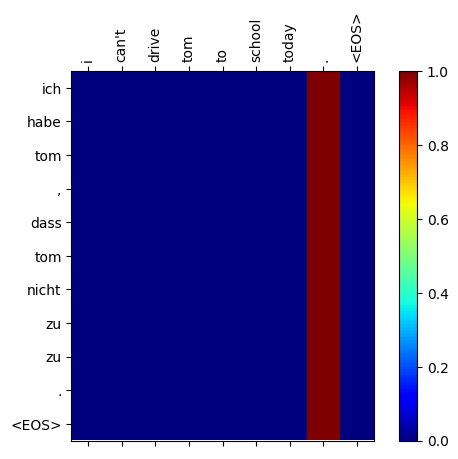

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


  2%|2                  | 300/19690 [01:41<46:13,  6.99it/s]
1m 41s (- 109m 29s), epoch=1, loss=4.04
  2%|3                  | 400/19690 [01:55<44:26,  7.23it/s]
1m 55s (- 93m 4s), epoch=1, loss=3.69
> prices went up .
= die preise sind gestiegen .
< sie sind ein paar . <EOS>


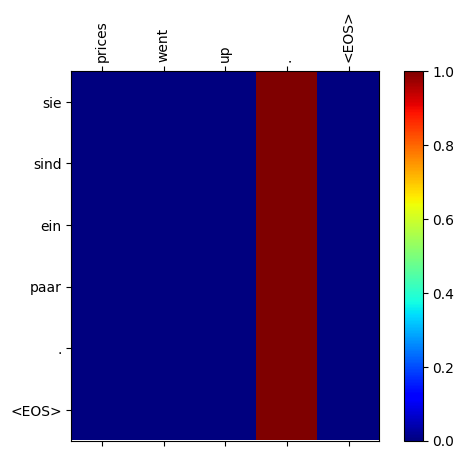

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


  3%|4                  | 500/19690 [02:10<44:41,  7.16it/s]
2m 10s (- 83m 13s), epoch=1, loss=3.43
  3%|5                  | 600/19690 [02:24<45:29,  6.99it/s]
2m 24s (- 76m 32s), epoch=1, loss=3.23
> he is still angry .
= er ist immer noch sauer .
< er ist ganz ganz . <EOS>


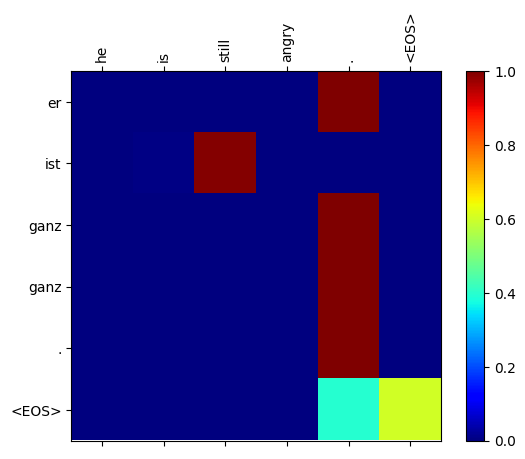

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


  4%|6                  | 700/19690 [02:38<45:36,  6.94it/s]
2m 38s (- 71m 49s), epoch=1, loss=3.05
  4%|7                  | 800/19690 [02:53<44:35,  7.06it/s]
2m 53s (- 68m 9s), epoch=1, loss=2.9
> did you know rotten eggs float ?
= wusstest du , dass faule eier schwimmen ?
< hast du schon einmal einmal gemacht ? <EOS>


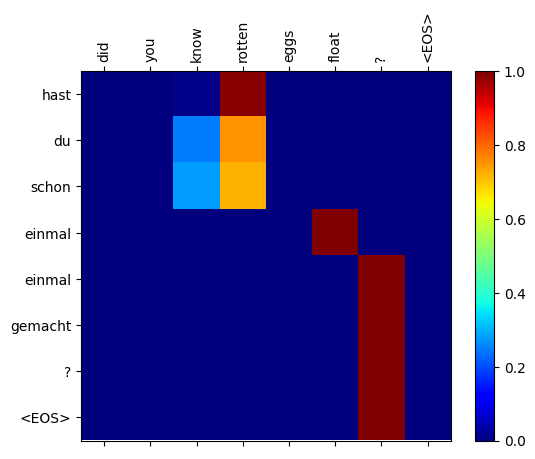

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


  5%|8                  | 900/19690 [03:07<45:40,  6.86it/s]
3m 7s (- 65m 22s), epoch=1, loss=2.76
  5%|9                 | 1000/19690 [03:22<45:40,  6.82it/s]
3m 22s (- 63m 3s), epoch=1, loss=2.63
> how may i help you ?
= wie darf ich ihnen helfen ?
< wie kann ich ihnen helfen ? <EOS>


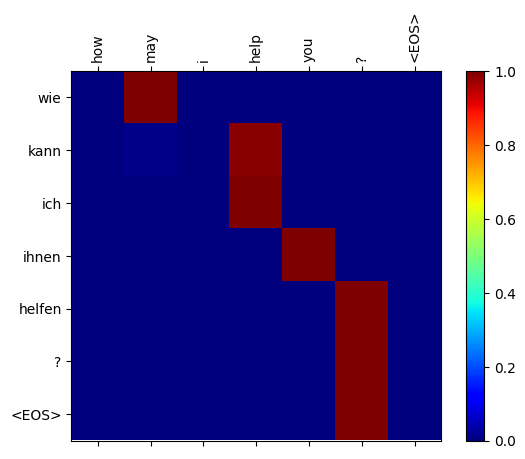

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


  6%|#                 | 1100/19690 [03:37<44:46,  6.92it/s]
3m 37s (- 61m 8s), epoch=1, loss=2.51
  6%|#                 | 1200/19690 [03:51<45:09,  6.82it/s]
3m 51s (- 59m 27s), epoch=1, loss=2.4
> be careful not to hurt tom's feelings .
= gib acht , dass du toms gefühle nicht verletzt .
< sei tom nicht zu hause . <EOS>


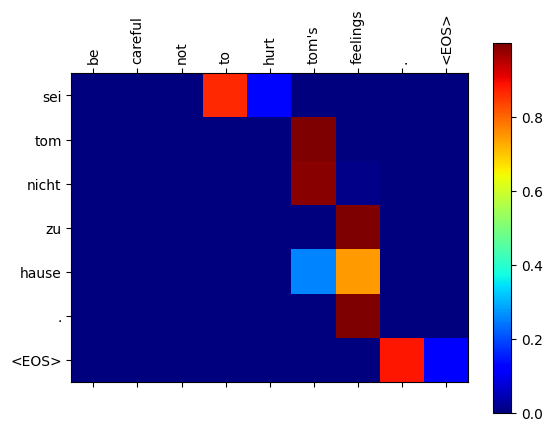

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


  7%|#1                | 1300/19690 [04:06<43:00,  7.13it/s]
4m 6s (- 58m 3s), epoch=1, loss=2.32
  7%|#2                | 1400/19690 [04:20<42:18,  7.20it/s]
4m 20s (- 56m 39s), epoch=1, loss=2.23
> she had nothing to do yesterday .
= sie hatte gestern nichts zu tun .
< sie hatte nichts zu tun . <EOS>


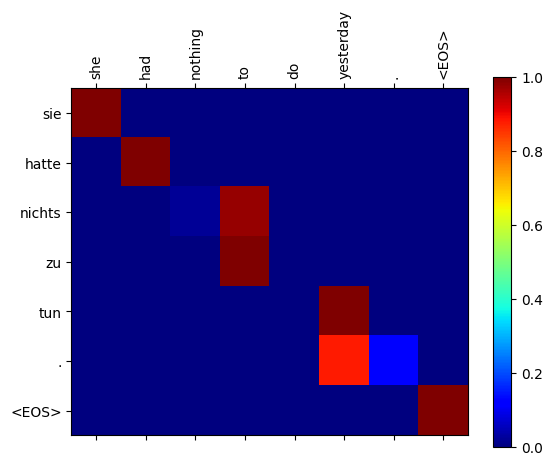

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


  8%|#3                | 1500/19690 [04:34<43:37,  6.95it/s]
4m 34s (- 55m 31s), epoch=1, loss=2.14
  8%|#4                | 1600/19690 [04:48<42:42,  7.06it/s]
4m 48s (- 54m 26s), epoch=1, loss=2.09
> you're the only friend i have .
= du bist der einzige freund , den ich habe .
< du bist nur der einzige freund , die ich bin . <EOS>


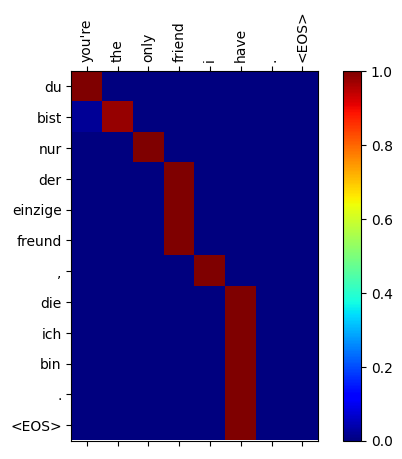

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


  9%|#5                | 1700/19690 [05:03<42:48,  7.00it/s]
5m 3s (- 53m 31s), epoch=1, loss=2.04
  9%|#6                | 1800/19690 [05:17<42:03,  7.09it/s]
5m 17s (- 52m 35s), epoch=1, loss=2.0
> don't get so excited !
= steigern sie sich nicht so rein !
< mach dich nicht so schnell ! <EOS>


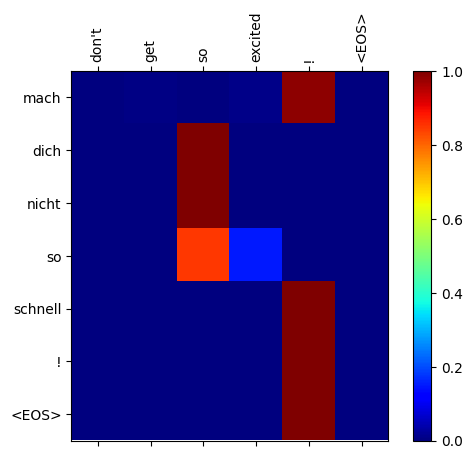

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 10%|#7                | 1900/19690 [05:31<41:48,  7.09it/s]
5m 31s (- 51m 45s), epoch=1, loss=1.92
 10%|#8                | 2000/19690 [05:46<42:54,  6.87it/s]
5m 46s (- 51m 1s), epoch=2, loss=1.84
> i believe tom is correct .
= ich glaube , dass tom recht hat .
< ich glaube , tom ist großartig . <EOS>


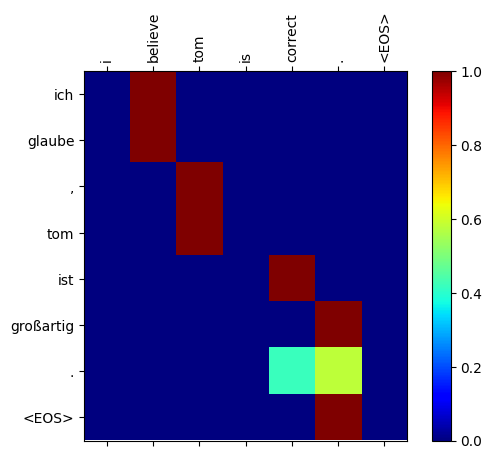

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 11%|#9                | 2100/19690 [06:00<41:50,  7.01it/s]
6m 0s (- 50m 19s), epoch=2, loss=1.81
 11%|##                | 2200/19690 [06:14<41:51,  6.96it/s]
6m 14s (- 49m 38s), epoch=2, loss=1.76
> many people do that .
= das machen viele leute .
< viele leute tun das . <EOS>


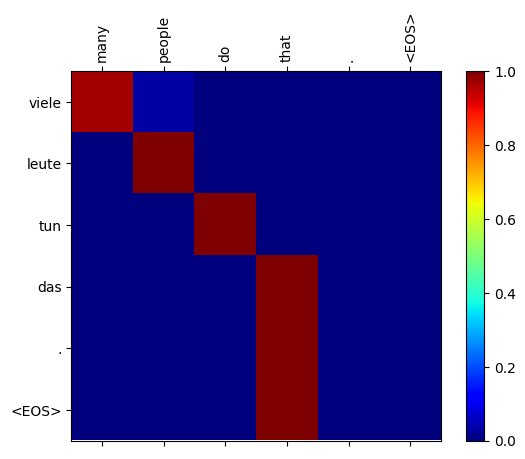

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 12%|##1               | 2300/19690 [06:29<41:58,  6.91it/s]
6m 29s (- 49m 3s), epoch=2, loss=1.73
 12%|##1               | 2400/19690 [06:43<41:24,  6.96it/s]
6m 43s (- 48m 27s), epoch=2, loss=1.69
> if you have no liking for modern music , you will not enjoy this concert .
= wenn sie keine neigung für moderne musik haben , wird ihnen das konzert nicht gefallen .
< wenn du nicht für dich warten hast , wirst du dieses wort nicht bezahlt . <EOS>


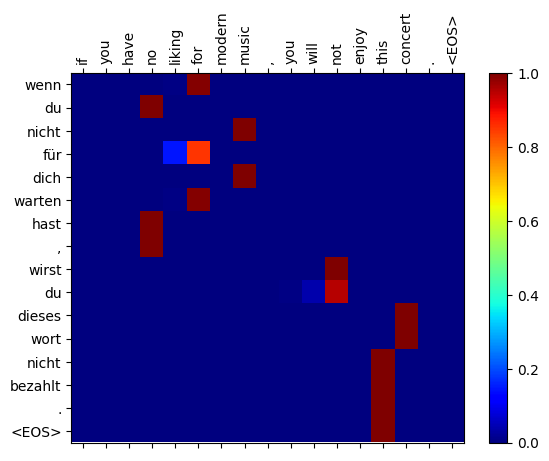

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 13%|##2               | 2500/19690 [06:58<39:20,  7.28it/s]
6m 58s (- 47m 54s), epoch=2, loss=1.65
 13%|##3               | 2600/19690 [07:12<41:01,  6.94it/s]
7m 12s (- 47m 22s), epoch=2, loss=1.61
> that was the moment of truth .
= das war der moment der wahrheit .
< das war die richtige wahrheit . <EOS>


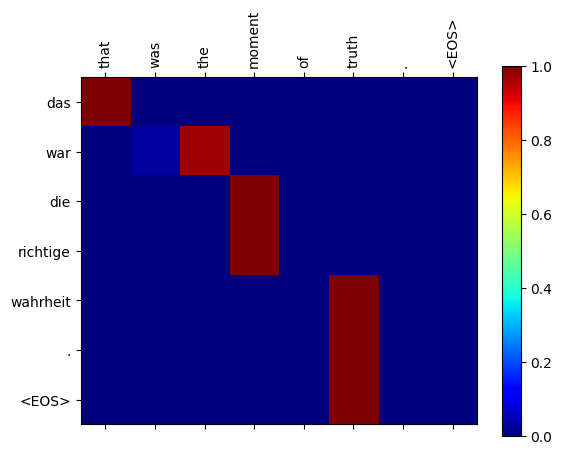

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 14%|##4               | 2700/19690 [07:27<41:55,  6.76it/s]
7m 27s (- 46m 54s), epoch=2, loss=1.59
 14%|##5               | 2800/19690 [07:41<40:17,  6.99it/s]
7m 41s (- 46m 22s), epoch=2, loss=1.54
> i have just been to sapporo station to see my mother off .
= ich war gerade am bahnhof sapporo und habe meine mutter verabschiedet .
< ich habe gerade erst mit meiner mutter angefangen , den ich zu meinem freund getroffen hatte . <EOS>


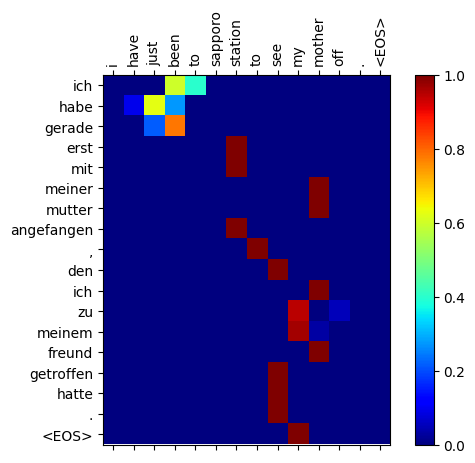

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 15%|##6               | 2900/19690 [07:56<39:49,  7.03it/s]
7m 56s (- 45m 56s), epoch=2, loss=1.52
 15%|##7               | 3000/19690 [08:10<39:30,  7.04it/s]
8m 10s (- 45m 27s), epoch=2, loss=1.47
> i'll have to tell tom the truth tomorrow .
= ich werde tom morgen die wahrheit sagen müssen .
< ich werde tom die wahrheit sagen müssen . <EOS>


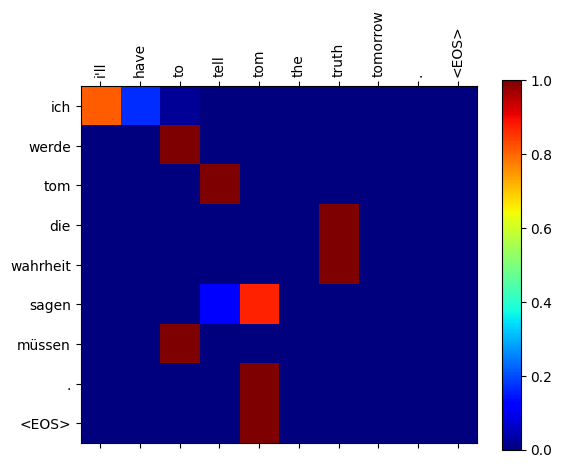

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 16%|##8               | 3100/19690 [08:24<39:27,  7.01it/s]
8m 24s (- 45m 1s), epoch=2, loss=1.48
 16%|##9               | 3200/19690 [08:39<39:33,  6.95it/s]
8m 39s (- 44m 34s), epoch=2, loss=1.44
> tom doesn't have a computer .
= tom hat keinen computer .
< tom hat keinen computer . <EOS>


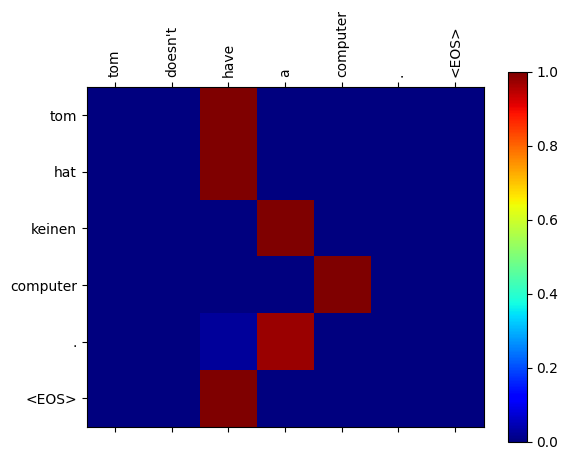

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 17%|###               | 3300/19690 [08:53<38:54,  7.02it/s]
8m 53s (- 44m 9s), epoch=2, loss=1.43
 17%|###1              | 3400/19690 [09:07<37:57,  7.15it/s]
9m 7s (- 43m 44s), epoch=2, loss=1.42
> you're the only one that can help us .
= du bist die einzige , die uns helfen kann .
< du bist nur der einzige , der uns helfen kann . <EOS>


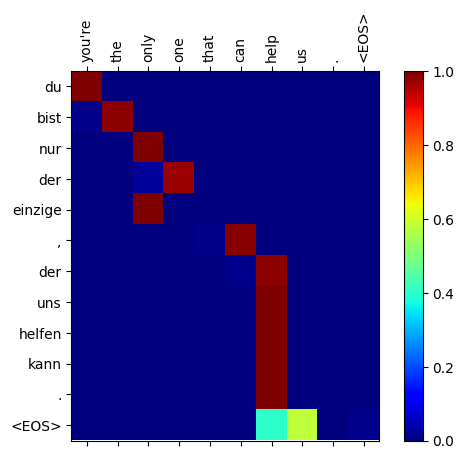

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 18%|###1              | 3500/19690 [09:22<38:40,  6.98it/s]
9m 22s (- 43m 22s), epoch=2, loss=1.4
 18%|###2              | 3600/19690 [09:36<38:24,  6.98it/s]
9m 36s (- 42m 58s), epoch=2, loss=1.38
> mary pretended she was sick to avoid going to school .
= um nicht zur schule gehen zu müssen , tat maria so , als wäre sie krank .
< maria tat so , als wäre er nicht in der schule . <EOS>


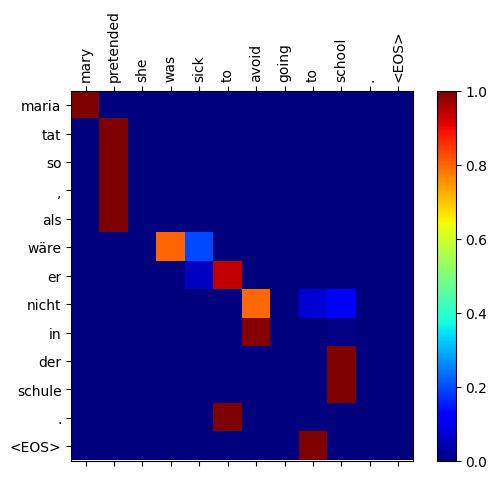

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 19%|###3              | 3700/19690 [09:51<37:29,  7.11it/s]
9m 51s (- 42m 35s), epoch=2, loss=1.33
 19%|###4              | 3800/19690 [10:05<37:24,  7.08it/s]
10m 5s (- 42m 11s), epoch=2, loss=1.33
> all of a sudden they stopped talking .
= plötzlich unterhielten sie sich nicht mehr .
< alle hörten hörten mit . <EOS>


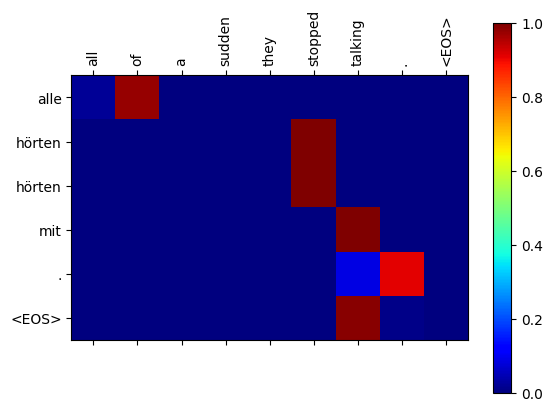

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 20%|###5              | 3900/19690 [10:19<36:53,  7.13it/s]
10m 19s (- 41m 49s), epoch=2, loss=1.3
 20%|###6              | 4000/19690 [10:34<36:34,  7.15it/s]
10m 34s (- 41m 27s), epoch=3, loss=1.29
> the grass is always greener on the other side of the fence .
= das gras der nachbarn ist immer grüner .
< das gras ist immer auf dem anderen des berges . <EOS>


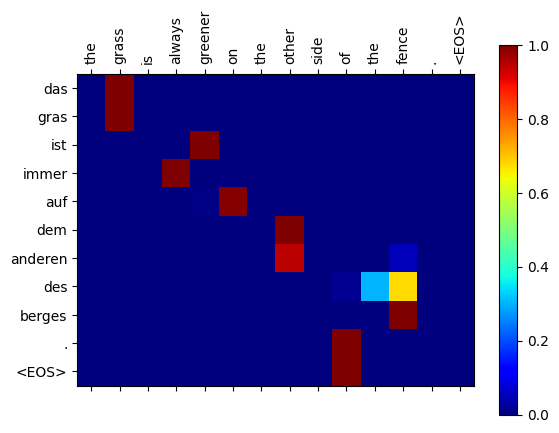

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 21%|###7              | 4100/19690 [10:48<37:15,  6.97it/s]
10m 48s (- 41m 7s), epoch=3, loss=1.27
 21%|###8              | 4200/19690 [11:03<37:33,  6.87it/s]
11m 3s (- 40m 45s), epoch=3, loss=1.26
> unless you can speak french , they won't understand you .
= wenn du kein französisch sprichst , werden sie dich nicht verstehen .
< wenn du französisch sprichst , wirst du dich nicht verstehen . <EOS>


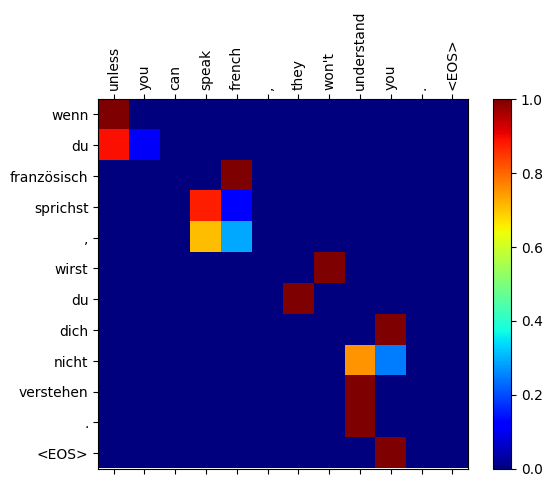

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 22%|###9              | 4300/19690 [11:17<36:22,  7.05it/s]
11m 17s (- 40m 25s), epoch=3, loss=1.23
 22%|####              | 4400/19690 [11:31<35:38,  7.15it/s]
11m 31s (- 40m 4s), epoch=3, loss=1.22
> he was fully clothed .
= er war vollständig bekleidet .
< er war vollständig bekleidet . <EOS>


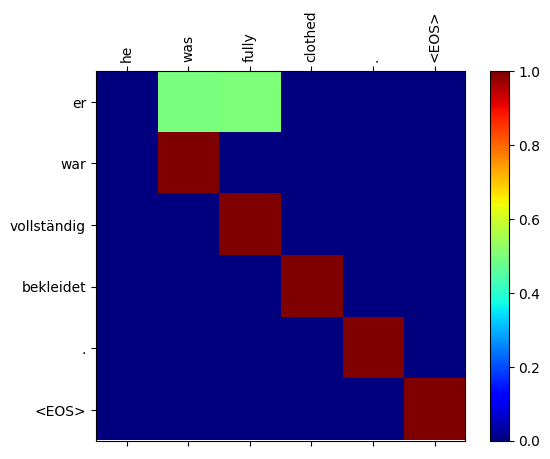

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 23%|####1             | 4500/19690 [11:46<35:58,  7.04it/s]
11m 46s (- 39m 44s), epoch=3, loss=1.2
 23%|####2             | 4600/19690 [12:00<36:08,  6.96it/s]
12m 0s (- 39m 23s), epoch=3, loss=1.17
> he picked up the rifle and aimed it at the target .
= er nahm das gewehr auf und richtete es auf das ziel .
< er nahm die schlüssel und hat es an der zielscheibe und die zielscheibe angenommen . <EOS>


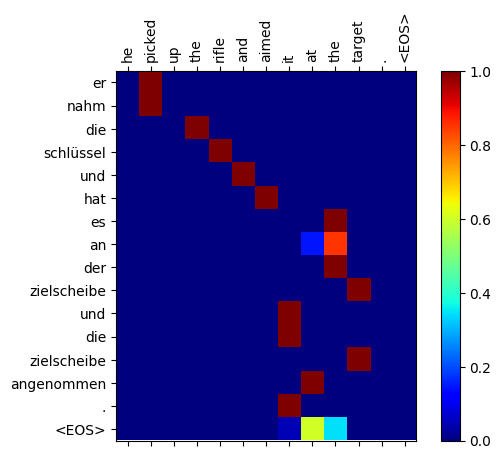

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 24%|####2             | 4700/19690 [12:14<34:53,  7.16it/s]
12m 14s (- 39m 3s), epoch=3, loss=1.16
 24%|####3             | 4800/19690 [12:29<35:39,  6.96it/s]
12m 29s (- 38m 44s), epoch=3, loss=1.16
> i am an artist .
= ich bin ein künstler .
< ich bin künstler . <EOS>


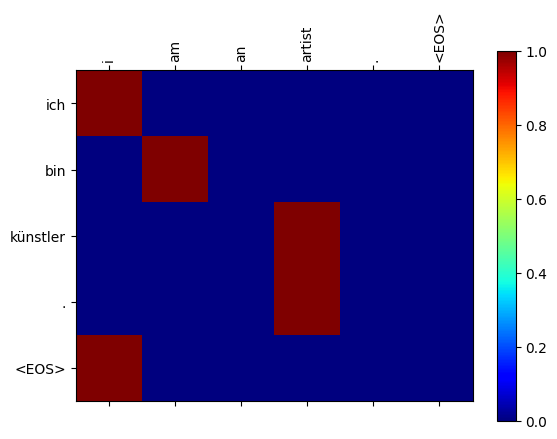

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 25%|####4             | 4900/19690 [12:43<34:51,  7.07it/s]
12m 43s (- 38m 25s), epoch=3, loss=1.15
 25%|####5             | 5000/19690 [12:58<34:53,  7.02it/s]
12m 58s (- 38m 7s), epoch=3, loss=1.15
> i go to the movies once in a while .
= ich gehe ab und an ins kino .
< ich gehe in einer stunde ins kino . <EOS>


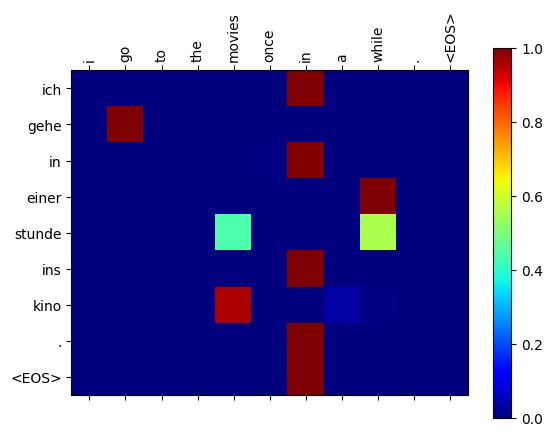

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 26%|####6             | 5100/19690 [13:12<34:50,  6.98it/s]
13m 12s (- 37m 48s), epoch=3, loss=1.12
 26%|####7             | 5200/19690 [13:26<34:35,  6.98it/s]
13m 26s (- 37m 28s), epoch=3, loss=1.12
> i'm not used to being yelled at .
= ich bin es nicht gewohnt , angeschrien zu werden .
< ich bin es nicht gewohnt , um dich zu kümmern . <EOS>


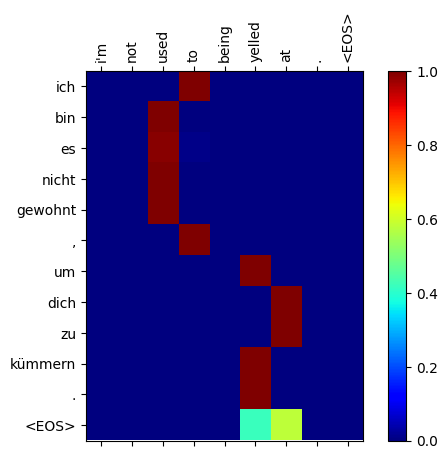

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 27%|####8             | 5300/19690 [13:41<33:59,  7.06it/s]
13m 41s (- 37m 9s), epoch=3, loss=1.11
 27%|####9             | 5400/19690 [13:55<34:31,  6.90it/s]
13m 55s (- 36m 51s), epoch=3, loss=1.09
> everything's in place .
= alles ist am platz .
< alles ist in form . <EOS>


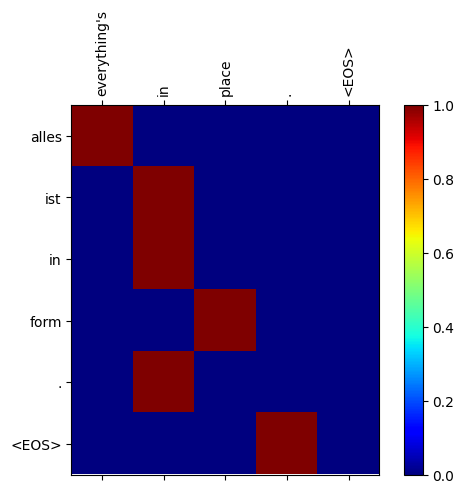

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 28%|#####             | 5500/19690 [14:10<34:25,  6.87it/s]
14m 10s (- 36m 33s), epoch=3, loss=1.08
 28%|#####1            | 5600/19690 [14:24<33:01,  7.11it/s]
14m 24s (- 36m 15s), epoch=3, loss=1.08
> he confessed his guilt .
= er gestand seine schuld .
< er gestand sein hörgerät . <EOS>


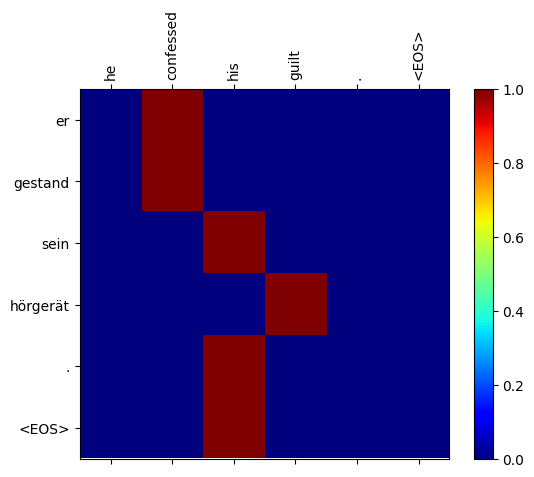

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 29%|#####2            | 5700/19690 [14:39<32:55,  7.08it/s]
14m 39s (- 35m 57s), epoch=3, loss=1.05
 29%|#####3            | 5800/19690 [14:53<32:42,  7.08it/s]
14m 53s (- 35m 39s), epoch=3, loss=1.08
> i've been on the phone all afternoon .
= ich bin schon den ganzen nachmittag am telefon .
< ich habe den ganzen nachmittag auf den ganzen nachmittag verbracht . <EOS>


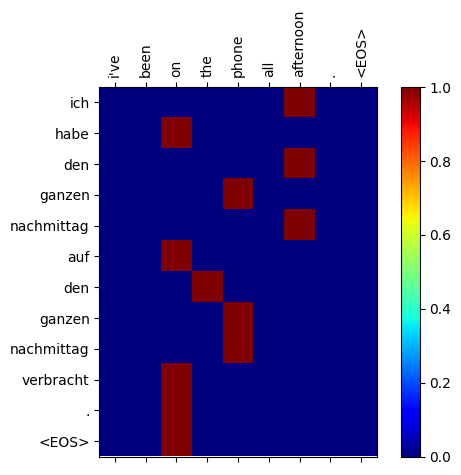

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 30%|#####3            | 5900/19690 [15:07<32:09,  7.15it/s]
15m 7s (- 35m 21s), epoch=3, loss=1.05
 30%|#####4            | 6000/19690 [15:21<31:54,  7.15it/s]
15m 21s (- 35m 3s), epoch=4, loss=1.05
> i'm going to help you .
= ich helfe dir jetzt .
< ich helfe dir . <EOS>


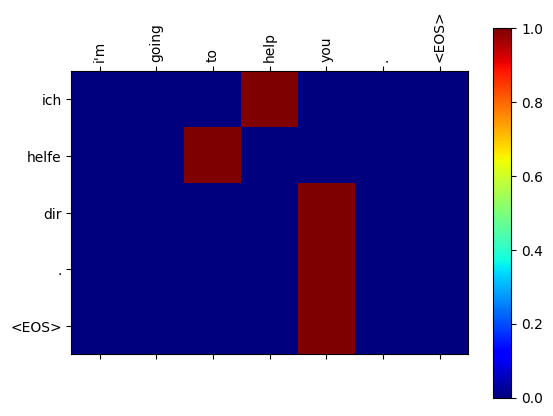

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 31%|#####5            | 6100/19690 [15:36<32:24,  6.99it/s]
15m 36s (- 34m 46s), epoch=4, loss=1.02
 31%|#####6            | 6200/19690 [15:50<31:58,  7.03it/s]
15m 50s (- 34m 28s), epoch=4, loss=1.02
> i feel very safe here .
= ich fühle mich hier sehr sicher .
< ich fühle mich hier sehr sicher . <EOS>


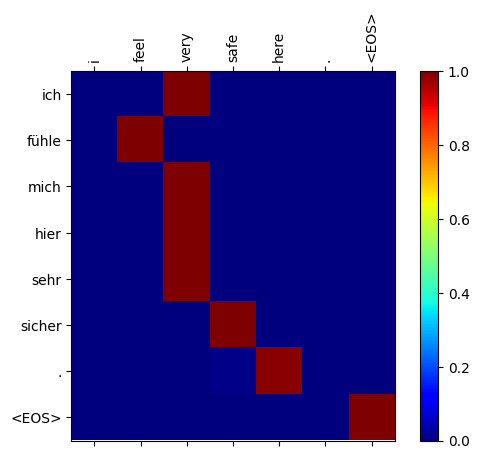

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 32%|#####7            | 6300/19690 [16:05<32:53,  6.78it/s]
16m 5s (- 34m 11s), epoch=4, loss=1.01
 33%|#####8            | 6400/19690 [16:19<30:56,  7.16it/s]
16m 19s (- 33m 53s), epoch=4, loss=1.01
> he asked me to help him .
= er bat mich , ihm zu helfen .
< er bat mich , ihm zu helfen . <EOS>


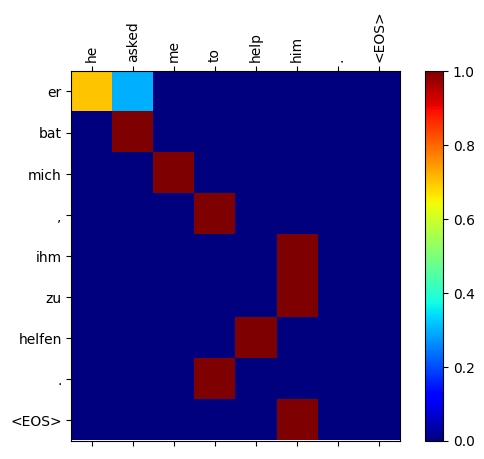

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 33%|#####9            | 6500/19690 [16:33<31:16,  7.03it/s]
16m 33s (- 33m 36s), epoch=4, loss=0.988
 34%|######            | 6600/19690 [16:48<31:05,  7.02it/s]
16m 48s (- 33m 19s), epoch=4, loss=0.98
> tom always wanted a dog .
= tom wollte schon immer einen hund .
< tom wollte immer einen hund . <EOS>


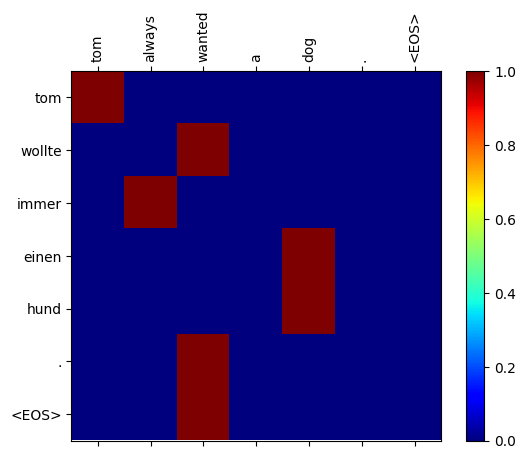

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 34%|######1           | 6700/19690 [17:02<31:13,  6.93it/s]
17m 2s (- 33m 3s), epoch=4, loss=0.977
 35%|######2           | 6800/19690 [17:16<29:59,  7.16it/s]
17m 16s (- 32m 45s), epoch=4, loss=0.979
> i'd like to be alone .
= ich möchte allein sein .
< ich würde gerne allein sein . <EOS>


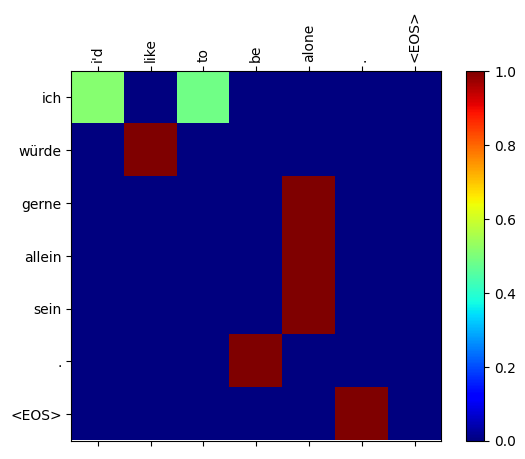

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 35%|######3           | 6900/19690 [17:31<29:44,  7.17it/s]
17m 31s (- 32m 28s), epoch=4, loss=0.968
 36%|######3           | 7000/19690 [17:45<30:26,  6.95it/s]
17m 45s (- 32m 11s), epoch=4, loss=0.946
> i've never had a friend quite like you .
= ich hatte noch einen freund so wie dich .
< ich hatte noch nie einen freund , wie du dich wirklich gesehen hattest . <EOS>


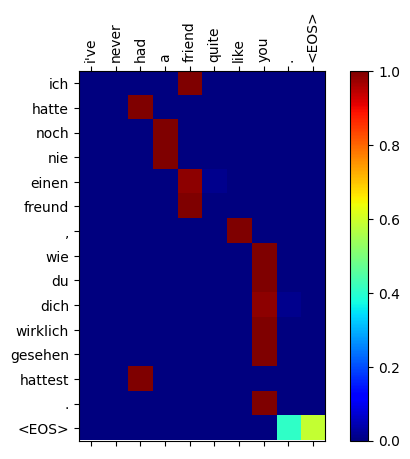

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 36%|######4           | 7100/19690 [18:00<29:20,  7.15it/s]
18m 0s (- 31m 55s), epoch=4, loss=0.922
 37%|######5           | 7200/19690 [18:14<29:54,  6.96it/s]
18m 14s (- 31m 38s), epoch=4, loss=0.924
> they went surfing .
= sie gingen surfen .
< sie gingen surfen zu fahren . <EOS>


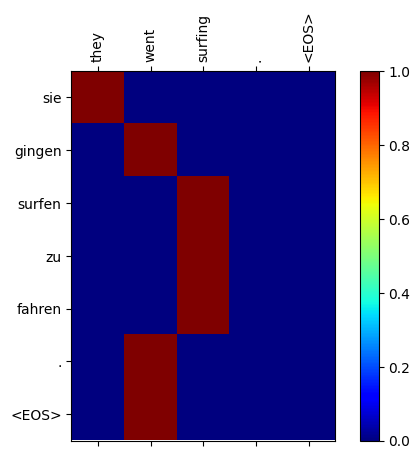

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 37%|######6           | 7300/19690 [18:28<28:26,  7.26it/s]
18m 28s (- 31m 21s), epoch=4, loss=0.901
 38%|######7           | 7400/19690 [18:42<28:37,  7.16it/s]
18m 42s (- 31m 4s), epoch=4, loss=0.908
> it was pretty close .
= das war ziemlich knapp .
< es war ziemlich knapp . <EOS>


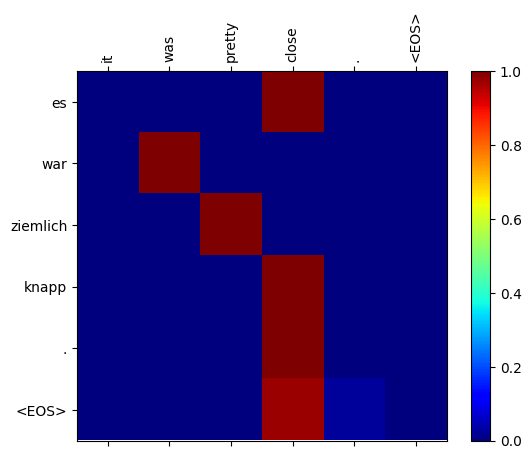

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 38%|######8           | 7500/19690 [18:57<29:05,  6.98it/s]
18m 57s (- 30m 48s), epoch=4, loss=0.897
 39%|######9           | 7600/19690 [19:11<28:06,  7.17it/s]
19m 11s (- 30m 31s), epoch=4, loss=0.897
> which eye is hurting you ?
= welches auge tut ihnen weh ?
< welches ist dir weh ? <EOS>


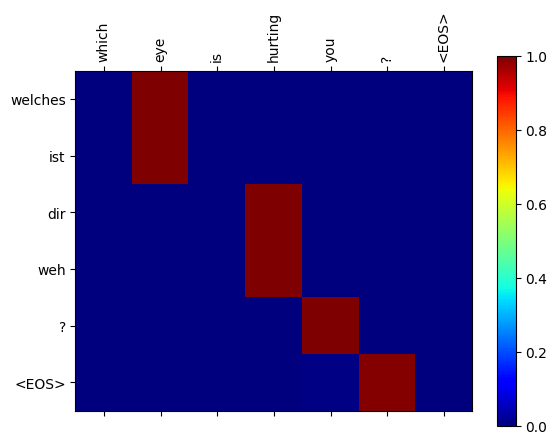

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 39%|#######           | 7700/19690 [19:25<28:16,  7.07it/s]
19m 25s (- 30m 14s), epoch=4, loss=0.908
 40%|#######1          | 7800/19690 [19:39<28:34,  6.94it/s]
19m 39s (- 29m 58s), epoch=4, loss=0.874
> he is not coming , either .
= er kommt auch nicht .
< er kommt auch nicht . <EOS>


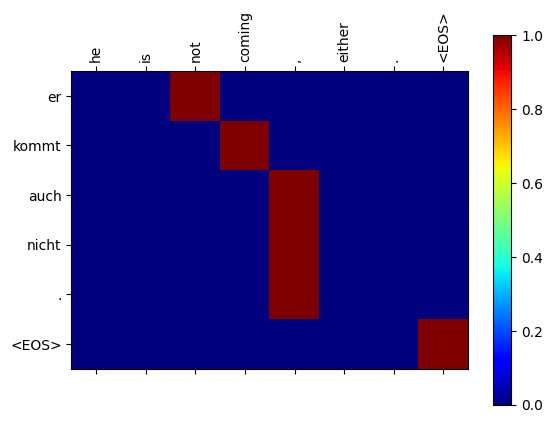

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 40%|#######2          | 7900/19690 [19:54<27:29,  7.15it/s]
19m 54s (- 29m 42s), epoch=5, loss=0.874
 41%|#######3          | 8000/19690 [20:08<27:53,  6.98it/s]
20m 8s (- 29m 25s), epoch=5, loss=0.876
> you like tom , don't you ?
= du magst tom , nicht wahr ?
< du magst tom , nicht wahr ? <EOS>


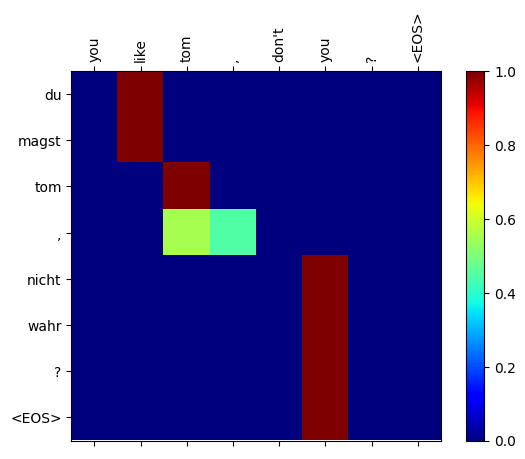

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 41%|#######4          | 8100/19690 [20:23<27:42,  6.97it/s]
20m 23s (- 29m 9s), epoch=5, loss=0.875
 42%|#######4          | 8200/19690 [20:37<27:15,  7.03it/s]
20m 37s (- 28m 53s), epoch=5, loss=0.854
> tom died at his home in boston .
= tom starb in seinem haus in boston .
< tom starb in seinem bostoner bostoner haus . <EOS>


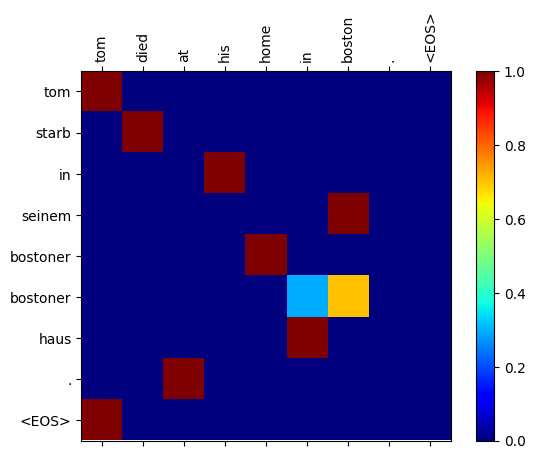

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 42%|#######5          | 8300/19690 [20:51<26:49,  7.08it/s]
20m 51s (- 28m 37s), epoch=5, loss=0.851
 43%|#######6          | 8400/19690 [21:05<25:56,  7.25it/s]
21m 5s (- 28m 21s), epoch=5, loss=0.856
> mary has never ever been asked out on a date .
= maria ist noch nie ausgeführt worden .
< maria war noch nie mit einem stelldichein ausgeführt . <EOS>


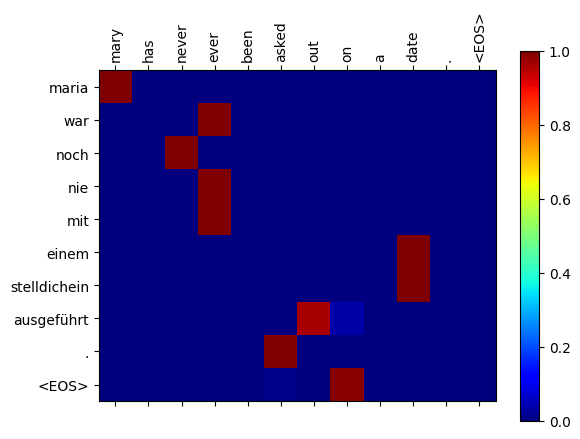

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 43%|#######7          | 8500/19690 [21:20<26:35,  7.01it/s]
21m 20s (- 28m 5s), epoch=5, loss=0.847
 44%|#######8          | 8600/19690 [21:34<26:10,  7.06it/s]
21m 34s (- 27m 48s), epoch=5, loss=0.835
> i had lost my pen .
= ich hatte meinen stift verloren .
< ich hatte meinen stift verloren . <EOS>


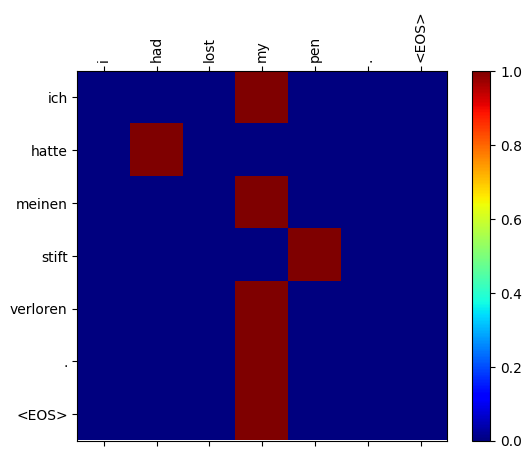

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 44%|#######9          | 8700/19690 [21:48<26:50,  6.82it/s]
21m 48s (- 27m 33s), epoch=5, loss=0.837
 45%|########          | 8800/19690 [22:02<25:45,  7.05it/s]
22m 2s (- 27m 17s), epoch=5, loss=0.826
> we plan to invite both tom and mary .
= wir planen , sowohl tom als auch mary einzuladen .
< wir planen vor tom , sowohl sowohl beide zu sein . <EOS>


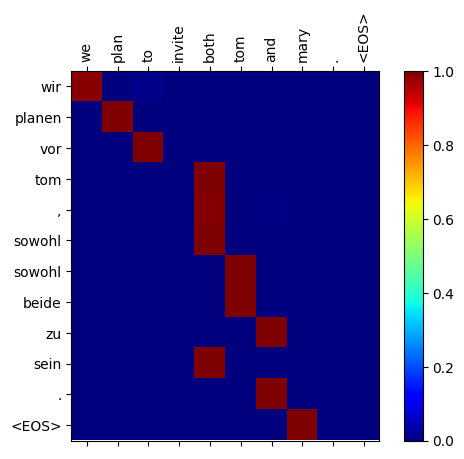

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 45%|########1         | 8900/19690 [22:17<25:02,  7.18it/s]
22m 17s (- 27m 1s), epoch=5, loss=0.815
 46%|########2         | 9000/19690 [22:31<25:11,  7.07it/s]
22m 31s (- 26m 45s), epoch=5, loss=0.812
> look how that ball bounces .
= sieh nur , wie der ball springt !
< schau , wie sich das ball knopf ! <EOS>


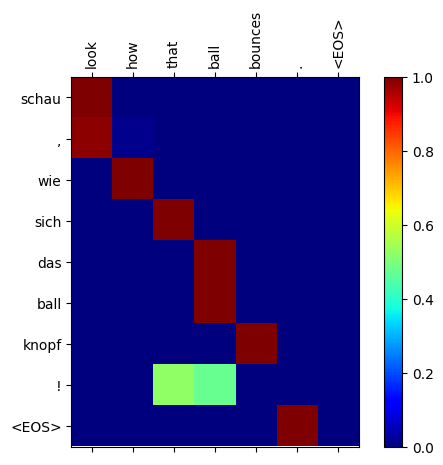

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 46%|########3         | 9100/19690 [22:46<25:04,  7.04it/s]
22m 46s (- 26m 29s), epoch=5, loss=0.816
 47%|########4         | 9200/19690 [23:00<24:32,  7.12it/s]
23m 0s (- 26m 13s), epoch=5, loss=0.807
> tom and mary are working nearby .
= tom und maria arbeiten in der nähe .
< tom und maria arbeiten in der nähe . <EOS>


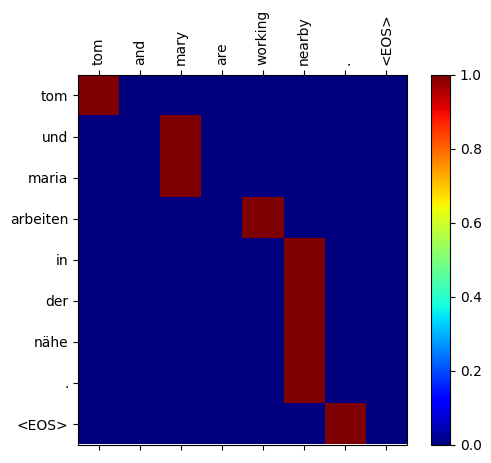

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 47%|########5         | 9300/19690 [23:14<24:38,  7.03it/s]
23m 14s (- 25m 58s), epoch=5, loss=0.798
 48%|########5         | 9400/19690 [23:28<24:12,  7.09it/s]
23m 28s (- 25m 42s), epoch=5, loss=0.807
> you're always complaining about your husband .
= sie beschweren sich ständig über ihren gatten .
< du machst dich immer über dein gatten . <EOS>


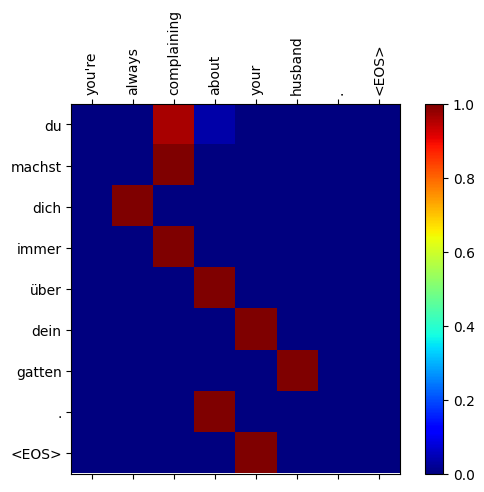

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 48%|########6         | 9500/19690 [23:43<24:14,  7.00it/s]
23m 43s (- 25m 26s), epoch=5, loss=0.807
 49%|########7         | 9600/19690 [23:57<23:55,  7.03it/s]
23m 57s (- 25m 10s), epoch=5, loss=0.782
> you just need help .
= du brauchst nur hilfe .
< du brauchst einfach hilfe . <EOS>


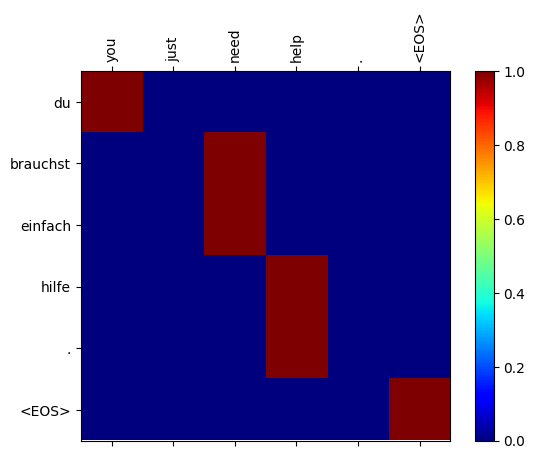

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 49%|########8         | 9700/19690 [24:12<23:59,  6.94it/s]
24m 12s (- 24m 55s), epoch=5, loss=0.777
 50%|########9         | 9800/19690 [24:26<23:25,  7.04it/s]
24m 26s (- 24m 39s), epoch=5, loss=0.787
> tom and mary like to get together and play cards .
= tom und maria spielen gerne zusammen karten .
< tom und maria spielen gerne zusammen und karten karten . <EOS>


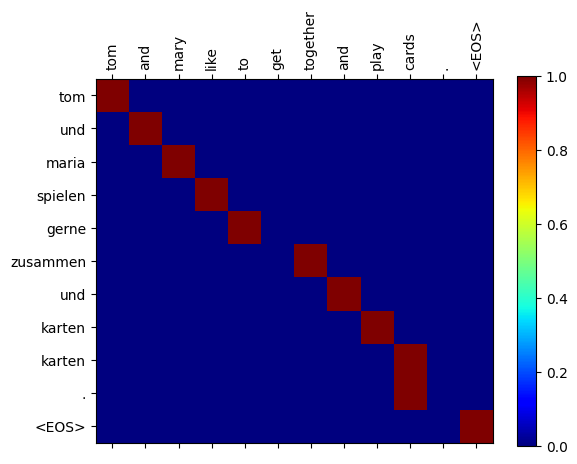

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 50%|#########         | 9900/19690 [24:40<23:30,  6.94it/s]
24m 40s (- 24m 24s), epoch=6, loss=0.777
 51%|########6        | 10000/19690 [24:55<23:36,  6.84it/s]
24m 55s (- 24m 9s), epoch=6, loss=0.769
> i know tom is in there .
= ich weiß , tom ist da drin .
< ich weiß , dass tom da ist . <EOS>


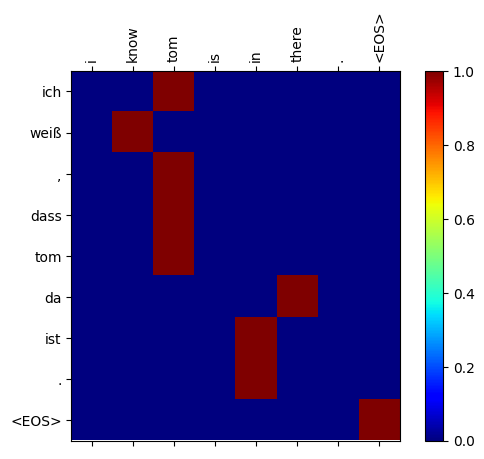

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 51%|########7        | 10100/19690 [25:09<22:29,  7.11it/s]
25m 9s (- 23m 53s), epoch=6, loss=0.779
 52%|########8        | 10200/19690 [25:24<22:31,  7.02it/s]
25m 24s (- 23m 38s), epoch=6, loss=0.764
> i've never flown first class .
= ich bin noch nie erster klasse geflogen .
< ich bin noch nie erster klasse geflogen . <EOS>


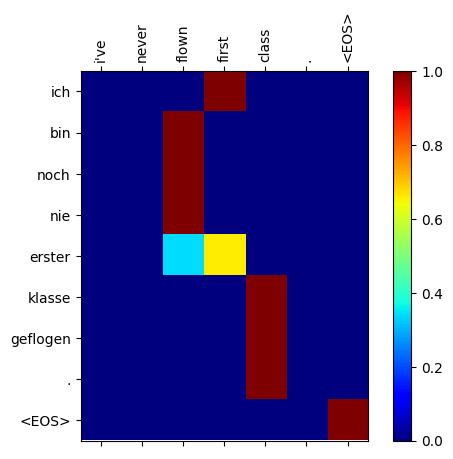

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 52%|########8        | 10300/19690 [25:38<21:59,  7.12it/s]
25m 38s (- 23m 22s), epoch=6, loss=0.749
 53%|########9        | 10400/19690 [25:52<21:51,  7.09it/s]
25m 52s (- 23m 7s), epoch=6, loss=0.756
> at first , the indians were friendly .
= am anfang waren die indianer freundlich .
< zuerst waren freundlich an der nähe des patienten . <EOS>


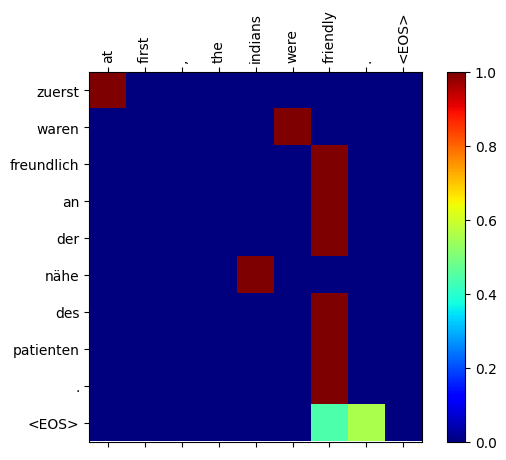

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 53%|#########        | 10500/19690 [26:07<22:02,  6.95it/s]
26m 7s (- 22m 51s), epoch=6, loss=0.751
 54%|#########1       | 10600/19690 [26:21<21:35,  7.02it/s]
26m 21s (- 22m 36s), epoch=6, loss=0.756
> do you like pears ?
= mögen sie birnen ?
< gefällt dir die birnen ? <EOS>


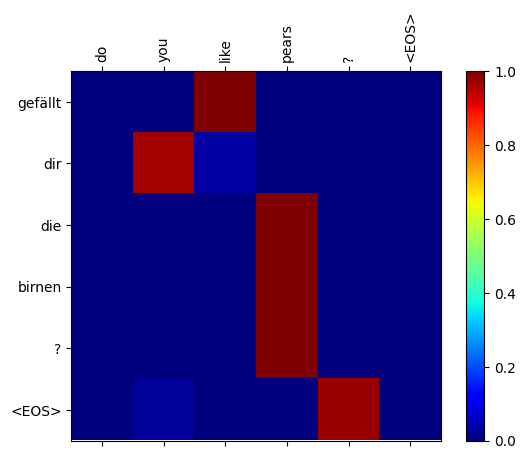

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 54%|#########2       | 10700/19690 [26:36<20:55,  7.16it/s]
26m 36s (- 22m 21s), epoch=6, loss=0.747
 55%|#########3       | 10800/19690 [26:50<21:10,  7.00it/s]
26m 50s (- 22m 5s), epoch=6, loss=0.736
> didn't tom suspect anything ?
= hat tom keinen verdacht geschöpft ?
< hat tom nichts ungewöhnliches ? <EOS>


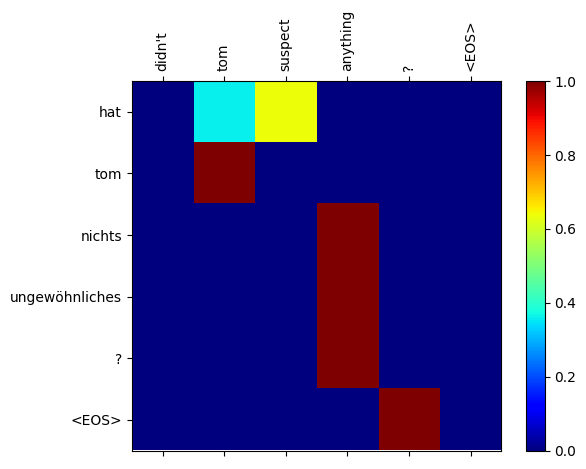

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 55%|#########4       | 10900/19690 [27:05<21:15,  6.89it/s]
27m 5s (- 21m 50s), epoch=6, loss=0.753
 56%|#########4       | 11000/19690 [27:19<20:25,  7.09it/s]
27m 19s (- 21m 35s), epoch=6, loss=0.719
> i let tom drive my car .
= ich ließ tom meinen wagen fahren .
< ich habe tom beim auto fahren lassen . <EOS>


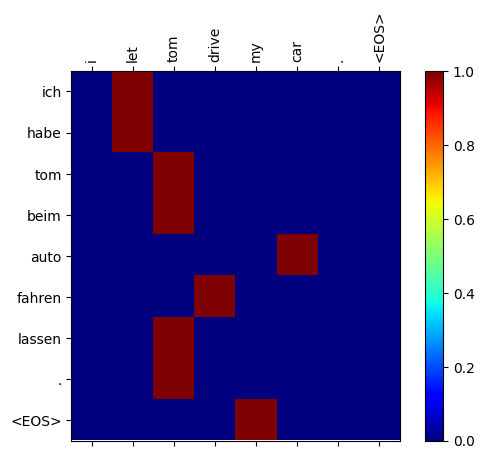

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 56%|#########5       | 11100/19690 [27:33<19:54,  7.19it/s]
27m 33s (- 21m 19s), epoch=6, loss=0.722
 57%|#########6       | 11200/19690 [27:47<20:15,  6.99it/s]
27m 47s (- 21m 4s), epoch=6, loss=0.731
> i really thought tom was happy .
= ich dachte wirklich , dass tom glücklich sei .
< ich dachte wirklich , tom sei glücklich . <EOS>


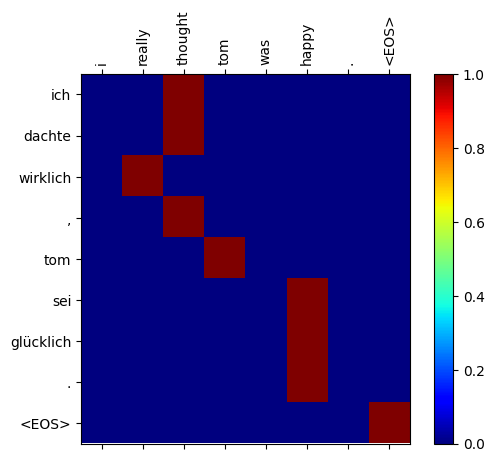

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 57%|#########7       | 11300/19690 [28:02<20:10,  6.93it/s]
28m 2s (- 20m 49s), epoch=6, loss=0.707
 58%|#########8       | 11400/19690 [28:16<20:01,  6.90it/s]
28m 16s (- 20m 33s), epoch=6, loss=0.713
> why do you hang out with tom ?
= warum gibst du dich mit tom ab ?
< warum machst du mit tom ? <EOS>


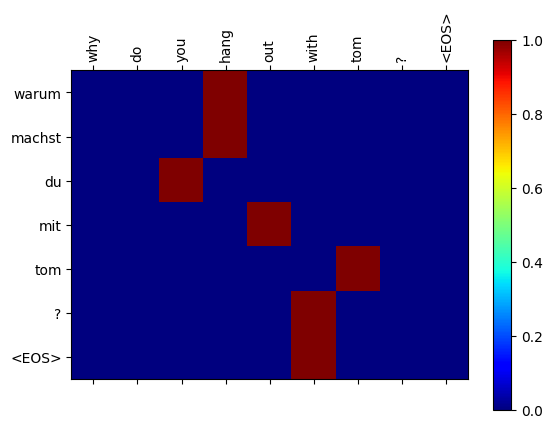

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 58%|#########9       | 11500/19690 [28:31<19:49,  6.89it/s]
28m 31s (- 20m 18s), epoch=6, loss=0.72
 59%|##########       | 11600/19690 [28:45<19:30,  6.91it/s]
28m 45s (- 20m 3s), epoch=6, loss=0.709
> where are they sending us ?
= wo schicken sie uns hin ?
< wer sind uns die plätze ? <EOS>


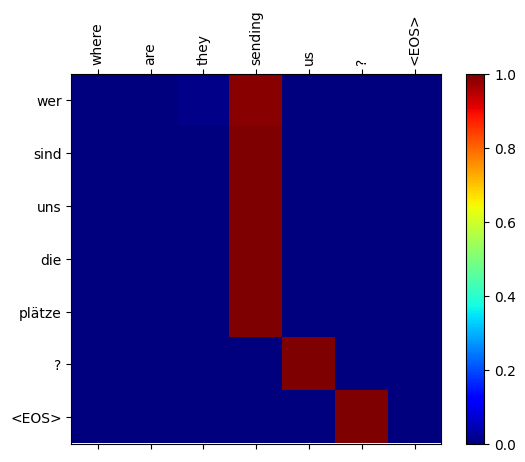

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 59%|##########1      | 11700/19690 [29:00<19:05,  6.97it/s]
29m 0s (- 19m 48s), epoch=6, loss=0.701
 60%|##########1      | 11800/19690 [29:14<18:34,  7.08it/s]
29m 14s (- 19m 32s), epoch=6, loss=0.686
> was it really that bad ?
= war es wirklich so schlimm ?
< war es wirklich so schlimm ? <EOS>


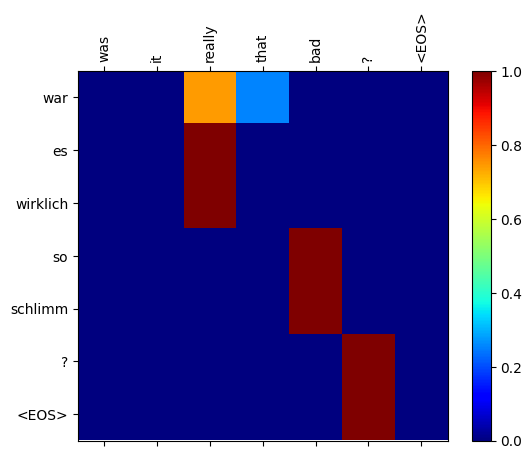

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 60%|##########2      | 11900/19690 [29:28<18:42,  6.94it/s]
29m 28s (- 19m 17s), epoch=7, loss=0.689
 61%|##########3      | 12000/19690 [29:42<18:24,  6.96it/s]
29m 42s (- 19m 2s), epoch=7, loss=0.675
> i want you to not go to boston with tom .
= ich möchte , dass du nicht mit tom nach boston gehst .
< ich möchte , dass du nicht mit tom nach boston fährst . <EOS>


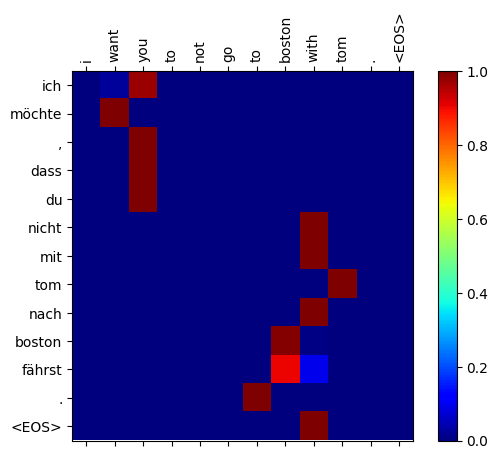

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 61%|##########4      | 12100/19690 [29:57<18:16,  6.92it/s]
29m 57s (- 18m 47s), epoch=7, loss=0.686
 62%|##########5      | 12200/19690 [30:11<18:28,  6.76it/s]
30m 11s (- 18m 32s), epoch=7, loss=0.688
> do it right away .
= kümmere dich gleich darum !
< tu es gleich . <EOS>


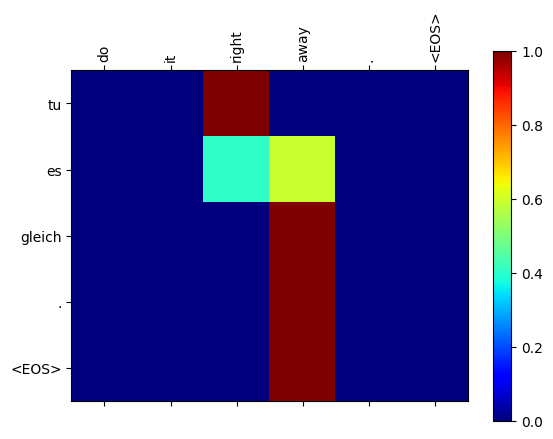

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 62%|##########6      | 12300/19690 [30:26<18:02,  6.83it/s]
30m 26s (- 18m 17s), epoch=7, loss=0.676
 63%|##########7      | 12400/19690 [30:40<16:52,  7.20it/s]
30m 40s (- 18m 2s), epoch=7, loss=0.681
> one billion people speak english .
= eine milliarde menschen sprechen englisch .
< man kann englisch englisch . <EOS>


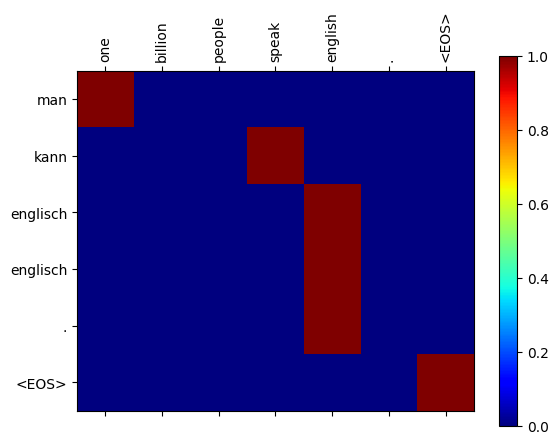

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 63%|##########7      | 12500/19690 [30:55<17:13,  6.96it/s]
30m 55s (- 17m 47s), epoch=7, loss=0.672
 64%|##########8      | 12600/19690 [31:09<16:50,  7.02it/s]
31m 9s (- 17m 31s), epoch=7, loss=0.664
> i want a television set , but i can't afford to buy one .
= ich möchte ein fernsehgerät haben , kann mir aber nicht leisten , eins zu kaufen .
< ich möchte einen fernseher , aber ich kann mir keinen leisten . <EOS>


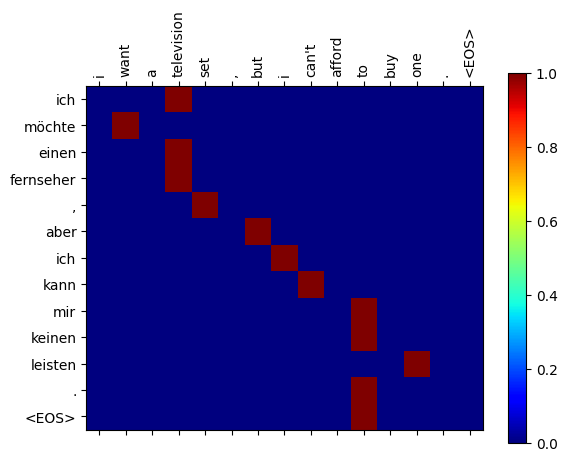

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 64%|##########9      | 12700/19690 [31:23<16:31,  7.05it/s]
31m 23s (- 17m 16s), epoch=7, loss=0.654
 65%|###########      | 12800/19690 [31:38<16:53,  6.80it/s]
31m 38s (- 17m 1s), epoch=7, loss=0.664
> let tom finish what he started .
= lasst tom zu ende führen , was er begonnen hat !
< lass tom zu ende bringen , was er begonnen hat ! <EOS>


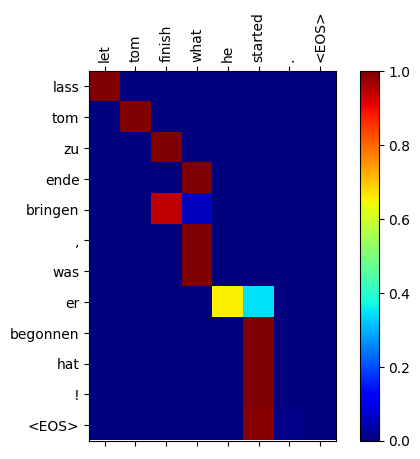

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 66%|###########1     | 12900/19690 [31:52<16:07,  7.02it/s]
31m 52s (- 16m 46s), epoch=7, loss=0.656
 66%|###########2     | 13000/19690 [32:07<16:09,  6.90it/s]
32m 7s (- 16m 31s), epoch=7, loss=0.669
> she will sometimes sit still for hours .
= sie sitzt manchmal stundenlang regungslos da .
< sie wird stundenlang regungslos regungslos regungslos regungslos . <EOS>


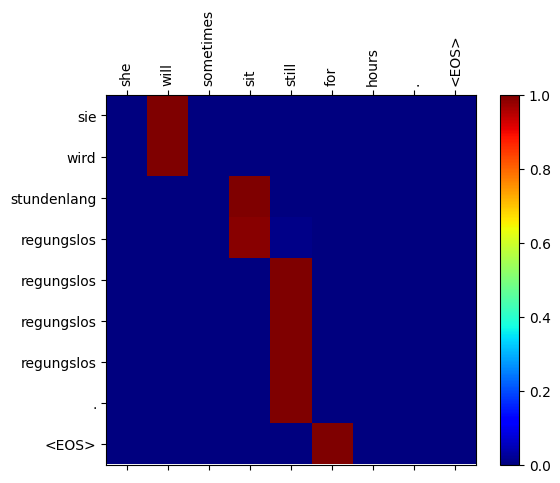

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 67%|###########3     | 13100/19690 [32:21<15:53,  6.91it/s]
32m 21s (- 16m 16s), epoch=7, loss=0.645
 67%|###########3     | 13200/19690 [32:35<14:53,  7.26it/s]
32m 35s (- 16m 1s), epoch=7, loss=0.636
> he works very hard .
= er arbeitet ziemlich hart .
< er arbeitet sehr hart . <EOS>


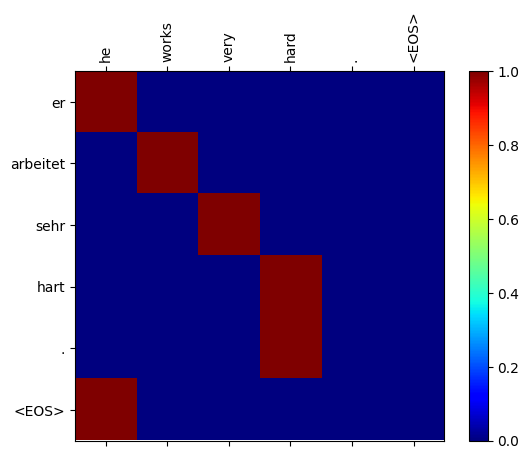

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 68%|###########4     | 13300/19690 [32:50<14:42,  7.24it/s]
32m 50s (- 15m 46s), epoch=7, loss=0.658
 68%|###########5     | 13400/19690 [33:04<14:24,  7.27it/s]
33m 4s (- 15m 31s), epoch=7, loss=0.641
> is it too salty ?
= ist er versalzen ?
< ist es versalzen ? <EOS>


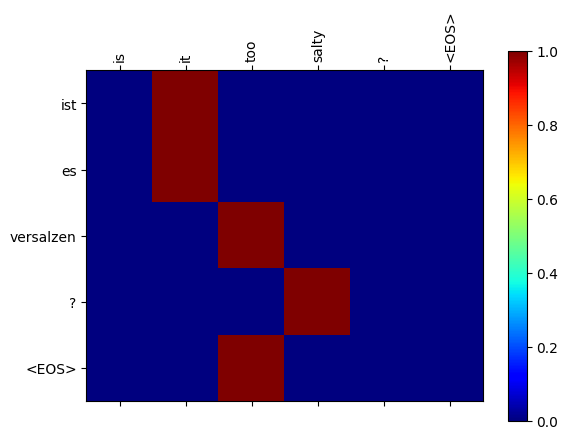

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 69%|###########6     | 13500/19690 [33:18<14:55,  6.91it/s]
33m 18s (- 15m 16s), epoch=7, loss=0.629
 69%|###########7     | 13600/19690 [33:32<14:29,  7.01it/s]
33m 32s (- 15m 1s), epoch=7, loss=0.626
> he put away his toys .
= er räumte seine spielsachen weg .
< er legte seine spielsachen spielsachen . <EOS>


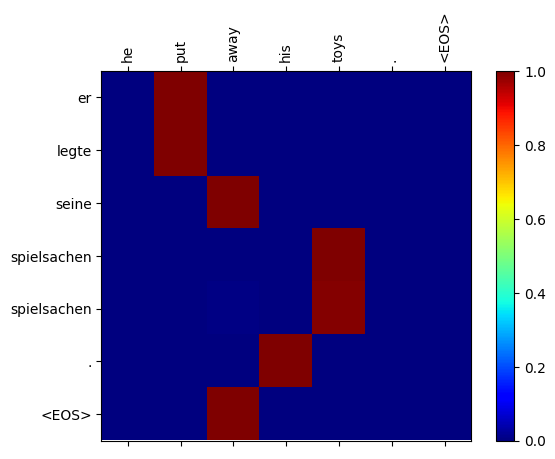

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 70%|###########8     | 13700/19690 [33:47<14:26,  6.91it/s]
33m 47s (- 14m 46s), epoch=7, loss=0.618
 70%|###########9     | 13800/19690 [34:01<13:32,  7.25it/s]
34m 1s (- 14m 31s), epoch=8, loss=0.625
> tom has meetings all day today .
= tom hat heute den ganzen tag besprechungen .
< tom hat heute den ganzen tag besprechungen zu sich . <EOS>


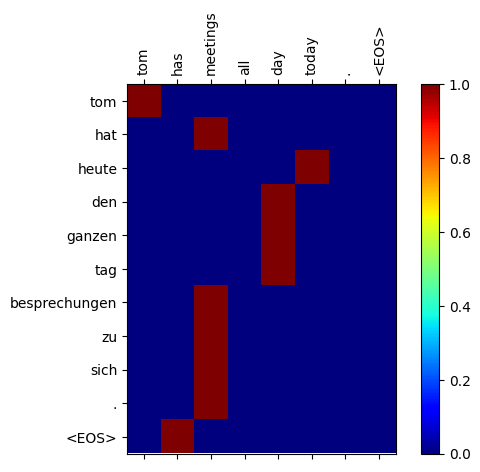

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 71%|############     | 13900/19690 [34:16<13:59,  6.90it/s]
34m 16s (- 14m 16s), epoch=8, loss=0.619
 71%|############     | 14000/19690 [34:30<13:38,  6.95it/s]
34m 30s (- 14m 1s), epoch=8, loss=0.606
> the classroom is full of teenagers . a couple of them are asleep .
= das klassenzimmer ist voller jugendlicher . ein paar schlafen .
< der fehler ist voller jahre . <EOS>


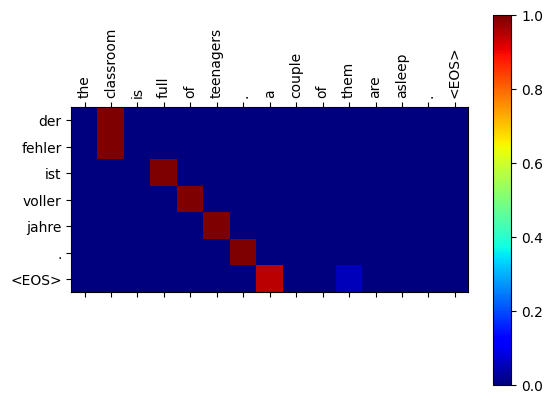

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 72%|############1    | 14100/19690 [34:44<12:52,  7.24it/s]
34m 44s (- 13m 46s), epoch=8, loss=0.62
 72%|############2    | 14200/19690 [34:58<13:04,  7.00it/s]
34m 58s (- 13m 31s), epoch=8, loss=0.605
> look through the telescope .
= sieh durch das teleskop !
< sieh durch den teleskop ! <EOS>


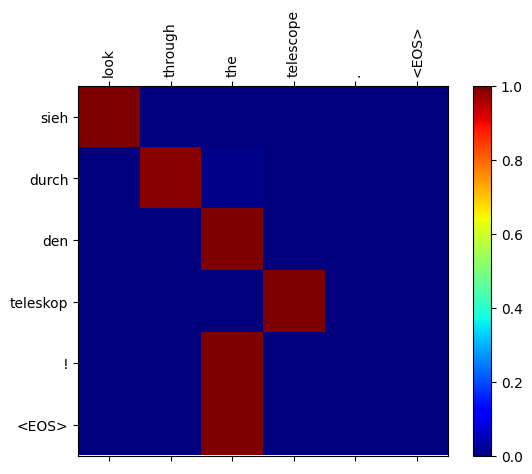

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 73%|############3    | 14300/19690 [35:13<12:14,  7.34it/s]
35m 13s (- 13m 16s), epoch=8, loss=0.61
 73%|############4    | 14400/19690 [35:27<12:48,  6.89it/s]
35m 27s (- 13m 1s), epoch=8, loss=0.6
> someone is lying .
= jemand lügt .
< jemand lügt . <EOS>


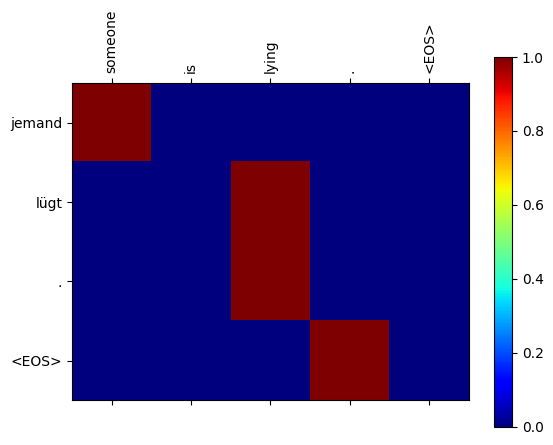

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 74%|############5    | 14500/19690 [35:42<12:14,  7.07it/s]
35m 42s (- 12m 46s), epoch=8, loss=0.611
 74%|############6    | 14600/19690 [35:56<12:00,  7.07it/s]
35m 56s (- 12m 31s), epoch=8, loss=0.599
> how many days did you spend in boston ?
= wie viele tage warst du in boston ?
< wie viele tage hast du in boston verbracht ? <EOS>


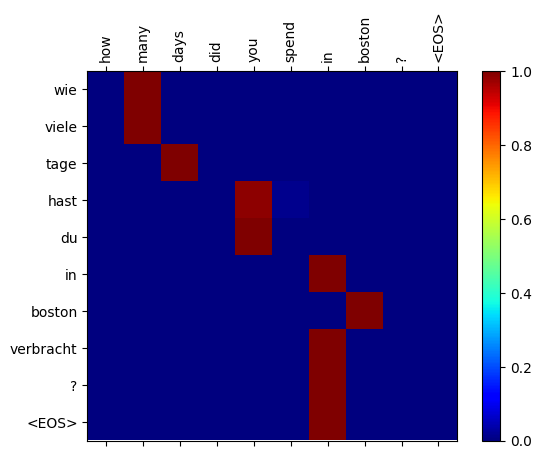

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 75%|############6    | 14700/19690 [36:10<11:47,  7.05it/s]
36m 10s (- 12m 16s), epoch=8, loss=0.594
 75%|############7    | 14800/19690 [36:24<11:35,  7.03it/s]
36m 24s (- 12m 1s), epoch=8, loss=0.596
> he will succeed to the throne .
= er wird auf den thron folgen .
< er wird auf die stelle bestehen . <EOS>


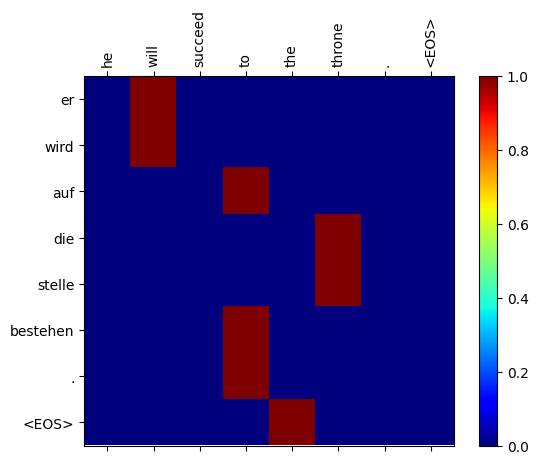

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 76%|############8    | 14900/19690 [36:39<11:33,  6.91it/s]
36m 39s (- 11m 47s), epoch=8, loss=0.586
 76%|############9    | 15000/19690 [36:53<11:07,  7.02it/s]
36m 53s (- 11m 32s), epoch=8, loss=0.578
> what do you want to do with your life ?
= was willst du mit deinem leben anfangen ?
< was willst du mit deinem leben machen ? <EOS>


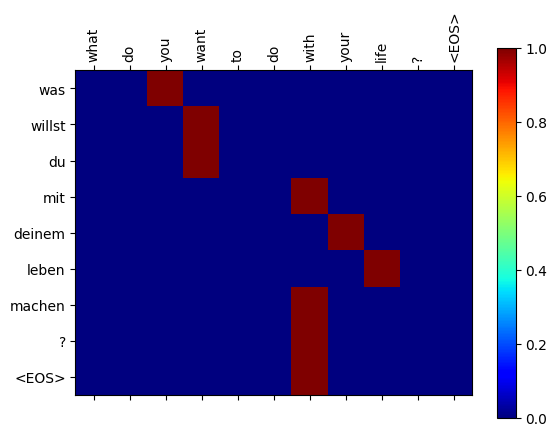

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 77%|#############    | 15100/19690 [37:07<10:53,  7.02it/s]
37m 7s (- 11m 17s), epoch=8, loss=0.575
 77%|#############1   | 15200/19690 [37:21<10:37,  7.05it/s]
37m 21s (- 11m 2s), epoch=8, loss=0.584
> this building has five elevators .
= in diesem gebäude gibt es fünf aufzüge .
< in diesem gebäude gibt es fünf aufzüge . <EOS>


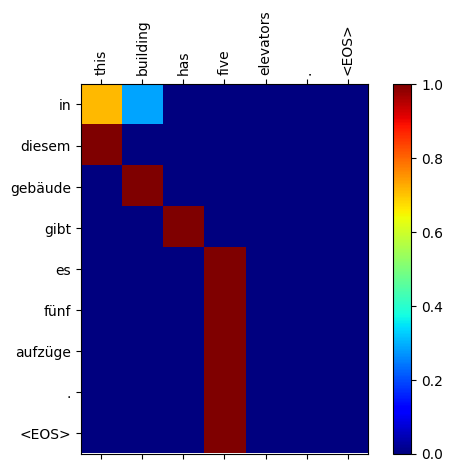

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 78%|#############2   | 15300/19690 [37:36<10:11,  7.18it/s]
37m 36s (- 10m 47s), epoch=8, loss=0.576
 78%|#############2   | 15400/19690 [37:50<10:08,  7.05it/s]
37m 50s (- 10m 32s), epoch=8, loss=0.577
> i don't care what you think .
= es ist mir egal , was du denkst .
< es ist mir egal , was du denkst . <EOS>


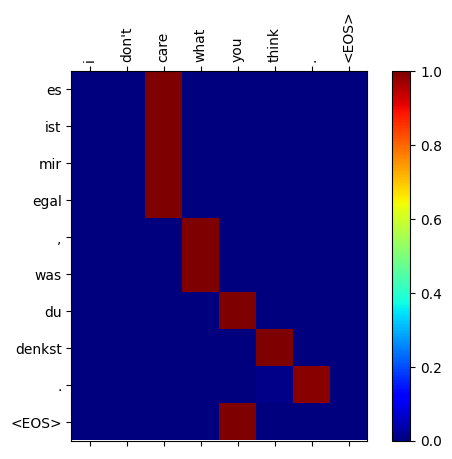

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 79%|#############3   | 15500/19690 [38:05<10:09,  6.88it/s]
38m 5s (- 10m 17s), epoch=8, loss=0.57
 79%|#############4   | 15600/19690 [38:19<09:43,  7.01it/s]
38m 19s (- 10m 2s), epoch=8, loss=0.585
> tom's cat disappeared for a few days .
= toms katze war einige tage verschwunden .
< toms katze ist einige tage verschwunden . <EOS>


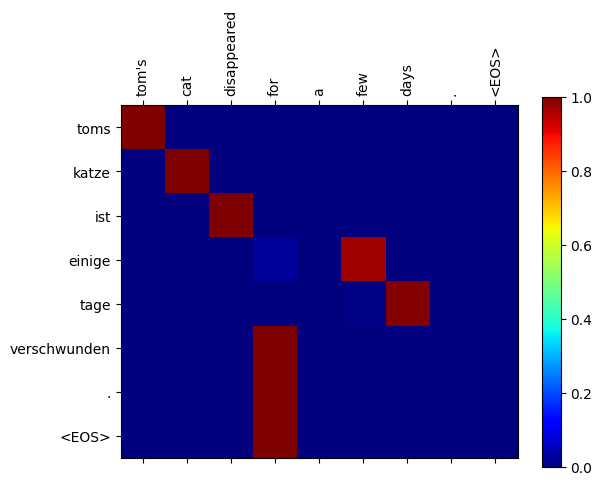

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 80%|#############5   | 15700/19690 [38:34<09:18,  7.14it/s]
38m 34s (- 9m 48s), epoch=8, loss=0.571
 80%|#############6   | 15800/19690 [38:48<09:06,  7.12it/s]
38m 48s (- 9m 33s), epoch=9, loss=0.559
> may i go home ?
= darf ich nach hause gehen ?
< darf ich nach hause gehen ? <EOS>


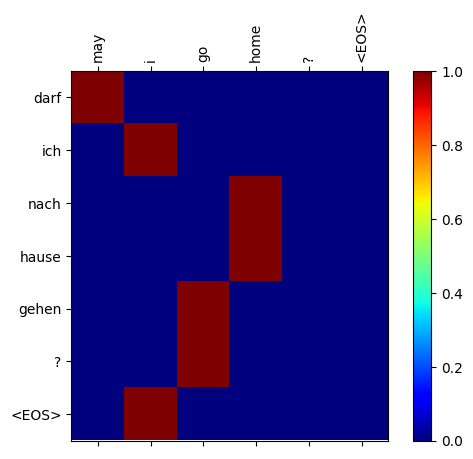

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 81%|#############7   | 15900/19690 [39:02<09:06,  6.93it/s]
39m 2s (- 9m 18s), epoch=9, loss=0.565
 81%|#############8   | 16000/19690 [39:16<08:42,  7.06it/s]
39m 16s (- 9m 3s), epoch=9, loss=0.568
> where are you going to spend the night ?
= wo werdet ihr übernachten ?
< wo wirst du übernachten ? <EOS>


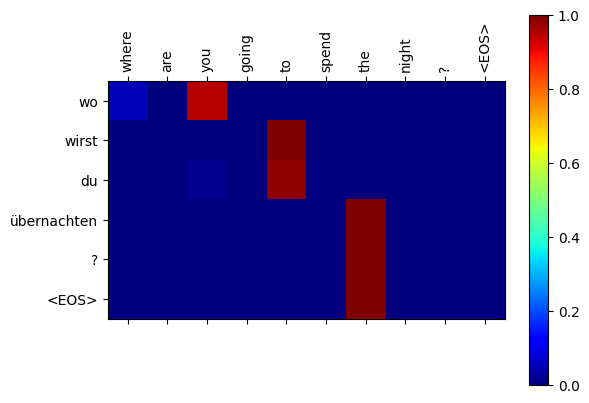

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 82%|#############9   | 16100/19690 [39:31<08:22,  7.14it/s]
39m 31s (- 8m 48s), epoch=9, loss=0.558
 82%|#############9   | 16200/19690 [39:45<08:29,  6.86it/s]
39m 45s (- 8m 33s), epoch=9, loss=0.559
> tom is busy right now and he can't help you .
= tom hat gerade zu tun und kann euch nicht helfen .
< tom ist gerade beschäftigt und kann dir nicht helfen . <EOS>


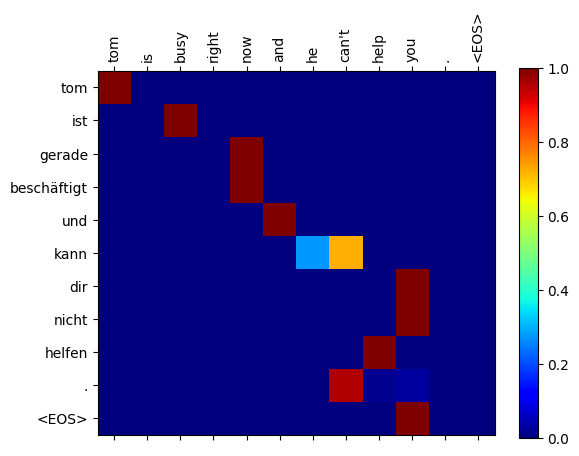

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 83%|##############   | 16300/19690 [40:00<08:07,  6.95it/s]
40m 0s (- 8m 19s), epoch=9, loss=0.55
 83%|##############1  | 16400/19690 [40:14<07:37,  7.19it/s]
40m 14s (- 8m 4s), epoch=9, loss=0.549
> what will my parents think ?
= was werden meine eltern denken ?
< was wird meine eltern denken ? <EOS>


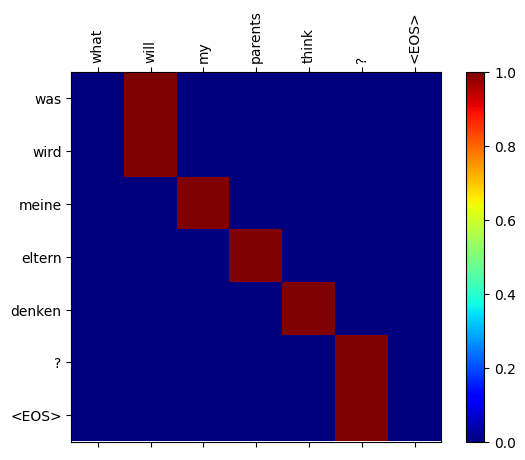

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 84%|##############2  | 16500/19690 [40:28<07:42,  6.90it/s]
40m 28s (- 7m 49s), epoch=9, loss=0.552
 84%|##############3  | 16600/19690 [40:43<07:25,  6.94it/s]
40m 43s (- 7m 34s), epoch=9, loss=0.554
> i don't want to hear any excuses .
= ich möchte keine ausreden hören .
< ich will keine ausreden hören . <EOS>


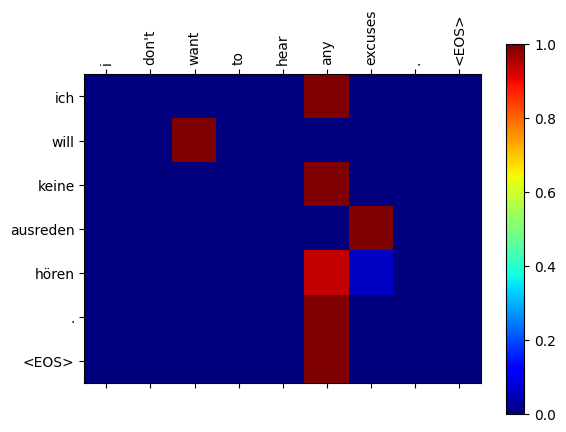

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 85%|##############4  | 16700/19690 [40:57<07:09,  6.96it/s]
40m 57s (- 7m 20s), epoch=9, loss=0.538
 85%|##############5  | 16800/19690 [41:11<06:49,  7.06it/s]
41m 11s (- 7m 5s), epoch=9, loss=0.554
> tom wasn't alone on the island .
= tom war nicht allein auf der insel .
< tom war nicht allein auf der insel . <EOS>


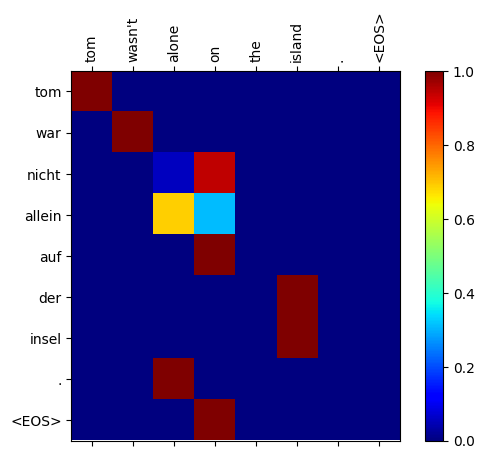

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 86%|##############5  | 16900/19690 [41:26<06:39,  6.99it/s]
41m 26s (- 6m 50s), epoch=9, loss=0.544
 86%|##############6  | 17000/19690 [41:41<06:29,  6.90it/s]
41m 41s (- 6m 35s), epoch=9, loss=0.546
> he is no longer a boy .
= er ist kein junge mehr .
< er ist nicht mehr ein kleiner junge . <EOS>


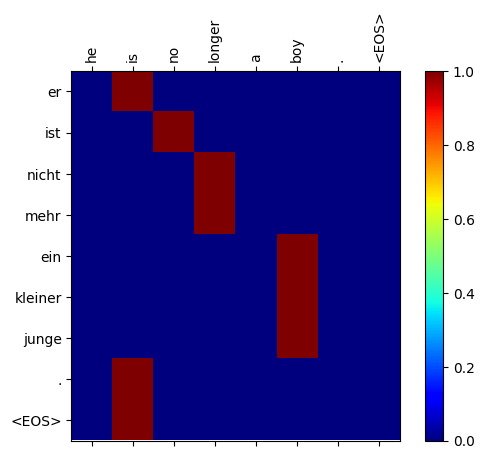

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 87%|##############7  | 17100/19690 [41:55<06:06,  7.07it/s]
41m 55s (- 6m 21s), epoch=9, loss=0.526
 87%|##############8  | 17200/19690 [42:10<06:02,  6.88it/s]
42m 10s (- 6m 6s), epoch=9, loss=0.538
> let me give you a piece of advice .
= lass mich dir einen rat geben .
< lass mich deinen rat geben . <EOS>


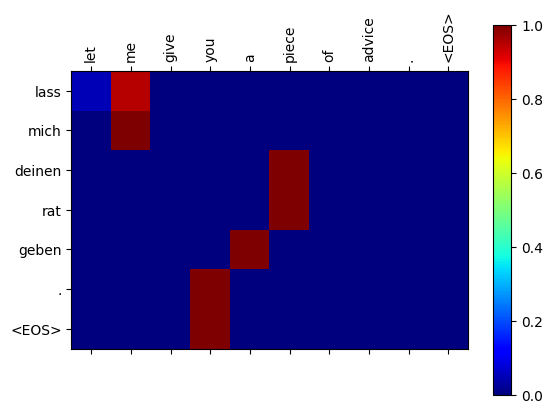

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 88%|##############9  | 17300/19690 [42:24<05:35,  7.12it/s]
42m 24s (- 5m 51s), epoch=9, loss=0.536
 88%|###############  | 17400/19690 [42:39<05:34,  6.85it/s]
42m 39s (- 5m 36s), epoch=9, loss=0.53
> shouldn't somebody be helping tom ?
= sollte tom nicht jemand helfen ?
< sollte tom nicht jemand helfen ? <EOS>


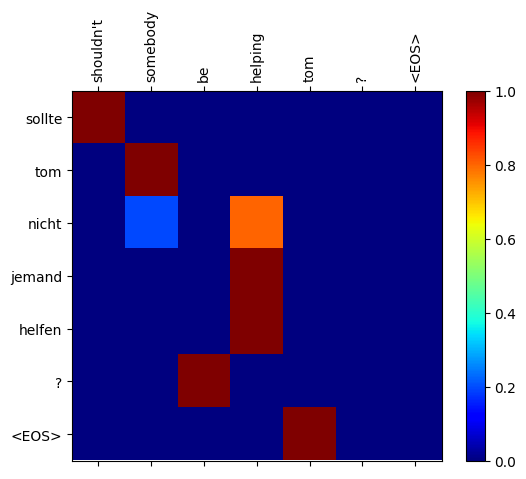

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 89%|###############1 | 17500/19690 [42:53<05:10,  7.04it/s]
42m 53s (- 5m 22s), epoch=9, loss=0.526
 89%|###############1 | 17600/19690 [43:08<05:00,  6.95it/s]
43m 8s (- 5m 7s), epoch=9, loss=0.523
> let's try !
= lasst es uns versuchen !
< lasst uns es versuchen ! <EOS>


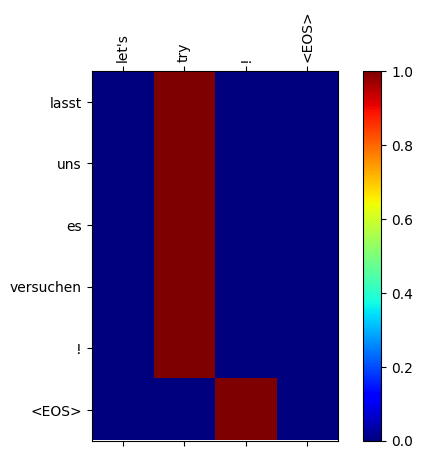

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 90%|###############2 | 17700/19690 [43:22<04:44,  6.98it/s]
43m 22s (- 4m 52s), epoch=9, loss=0.518
 90%|###############3 | 17800/19690 [43:36<04:27,  7.07it/s]
43m 36s (- 4m 37s), epoch=10, loss=0.521
> no one loves you as much as i do .
= niemand liebt dich so sehr wie ich .
< niemand liebt dich so sehr wie ich . <EOS>


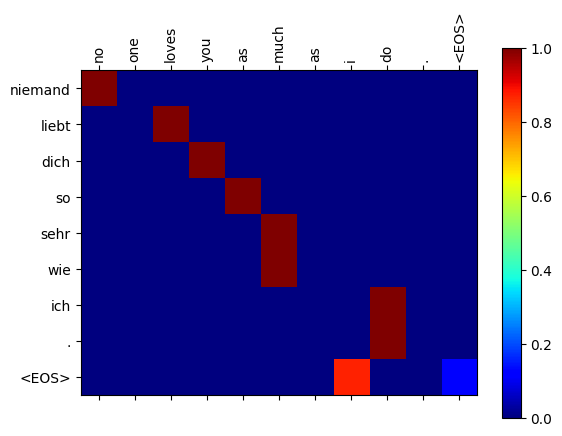

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 91%|###############4 | 17900/19690 [43:51<04:16,  6.98it/s]
43m 51s (- 4m 23s), epoch=10, loss=0.533
 91%|###############5 | 18000/19690 [44:05<03:55,  7.18it/s]
44m 5s (- 4m 8s), epoch=10, loss=0.513
> tom acts like a tough guy .
= tom führt sich wie ein harter bursche auf .
< tom benimmt sich wie ein harter bursche . <EOS>


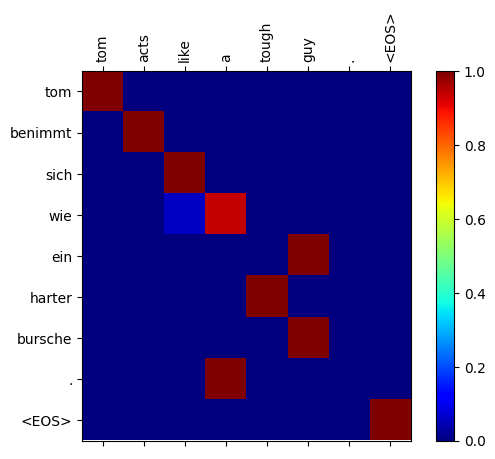

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 92%|###############6 | 18100/19690 [44:20<03:48,  6.95it/s]
44m 20s (- 3m 53s), epoch=10, loss=0.514
 92%|###############7 | 18200/19690 [44:34<03:28,  7.13it/s]
44m 34s (- 3m 38s), epoch=10, loss=0.511
> it's cool today .
= es ist frisch heute .
< heute ist es cool . <EOS>


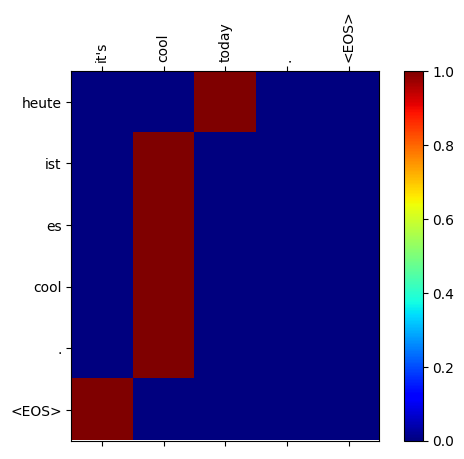

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 93%|###############7 | 18300/19690 [44:48<03:18,  7.01it/s]
44m 48s (- 3m 24s), epoch=10, loss=0.516
 93%|###############8 | 18400/19690 [45:03<03:07,  6.88it/s]
45m 3s (- 3m 9s), epoch=10, loss=0.512
> i don't really understand this .
= das verstehe ich wirklich nicht .
< das verstehe ich wirklich nicht . <EOS>


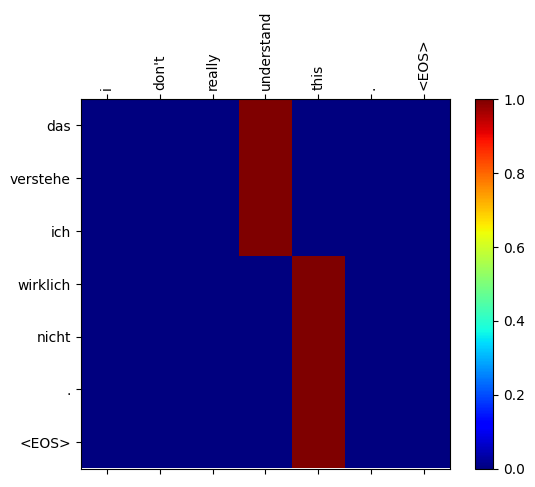

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 94%|###############9 | 18500/19690 [45:18<02:52,  6.90it/s]
45m 18s (- 2m 54s), epoch=10, loss=0.518
 94%|################ | 18600/19690 [45:32<02:36,  6.95it/s]
45m 32s (- 2m 40s), epoch=10, loss=0.506
> tom isn't much older than i am .
= tom ist nicht viel älter als ich .
< tom ist nicht viel älter als ich . <EOS>


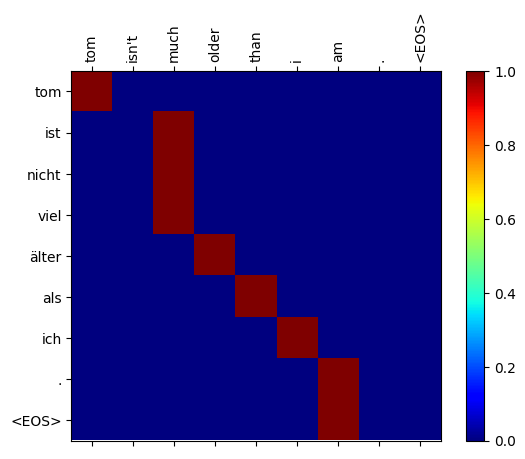

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 95%|################1| 18700/19690 [45:47<02:25,  6.83it/s]
45m 47s (- 2m 25s), epoch=10, loss=0.511
 95%|################2| 18800/19690 [46:01<02:04,  7.17it/s]
46m 1s (- 2m 10s), epoch=10, loss=0.5
> i doubt a native speaker would say it that way .
= ich bezweifle , dass sich ein muttersprachler so ausdrücken würde .
< ich bezweifle , dass sich ein muttersprachler so ausdrücken würde . <EOS>


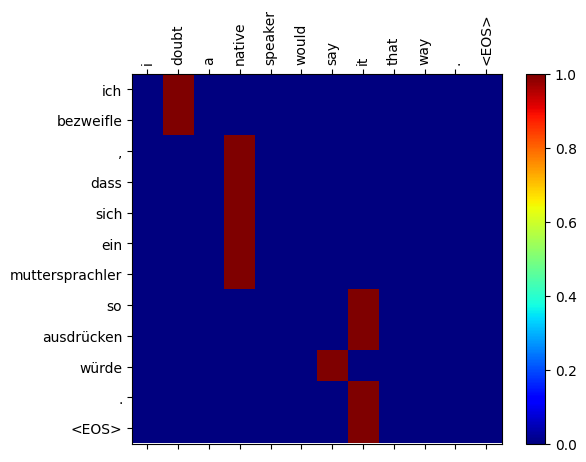

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 96%|################3| 18900/19690 [46:16<01:55,  6.86it/s]
46m 16s (- 1m 56s), epoch=10, loss=0.493
 96%|################4| 19000/19690 [46:30<01:40,  6.88it/s]
46m 30s (- 1m 41s), epoch=10, loss=0.493
> you need to try a little harder .
= du musst dich etwas mehr bemühen .
< ihr müsst euch etwas mehr mühe geben . <EOS>


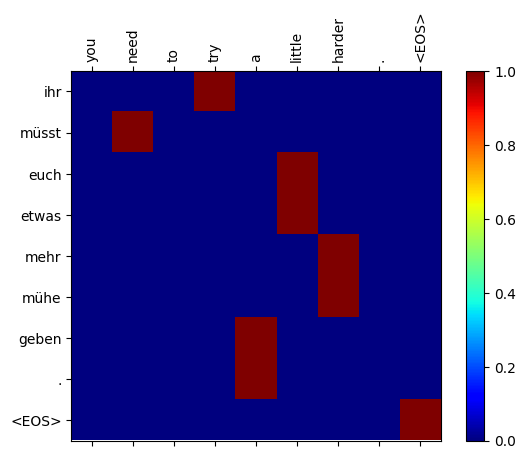

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 97%|################4| 19100/19690 [46:45<01:26,  6.85it/s]
46m 45s (- 1m 26s), epoch=10, loss=0.491
 98%|################5| 19200/19690 [46:59<01:10,  6.98it/s]
46m 59s (- 1m 11s), epoch=10, loss=0.486
> can you see anything out there ?
= kannst du da draußen etwas sehen ?
< können sie dort draußen etwas sehen ? <EOS>


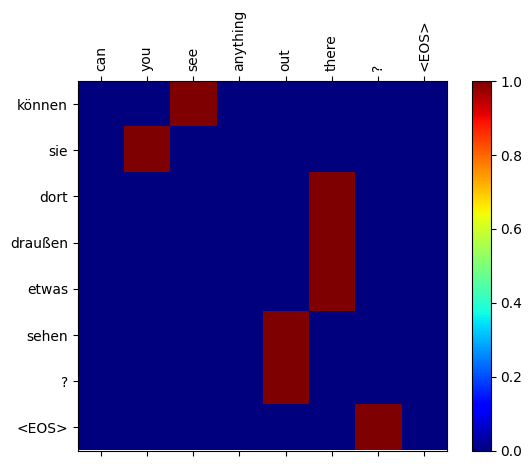

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 98%|################6| 19300/19690 [47:14<00:56,  6.92it/s]
47m 14s (- 0m 57s), epoch=10, loss=0.486
 99%|################7| 19400/19690 [47:28<00:41,  6.98it/s]
47m 28s (- 0m 42s), epoch=10, loss=0.491
> do you want another one of these ?
= wollt ihr noch eines von denen ?
< wollt ihr noch eine hiervon ? <EOS>


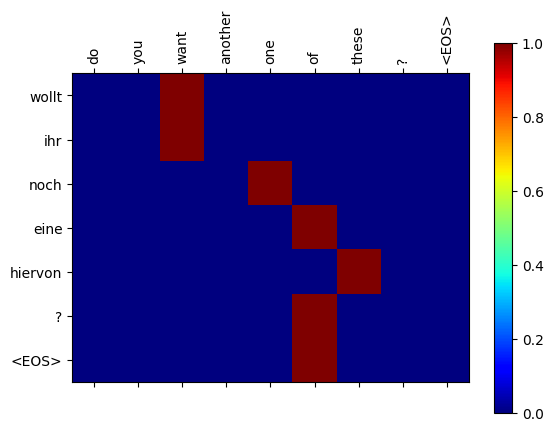

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


 99%|################8| 19500/19690 [47:42<00:26,  7.05it/s]
47m 42s (- 0m 27s), epoch=10, loss=0.483
100%|################9| 19600/19690 [47:57<00:12,  6.99it/s]
47m 57s (- 0m 13s), epoch=10, loss=0.477
> have a good christmas .
= ich wünsche dir frohe weihnachten .
< schöne weihnachten ! <EOS>


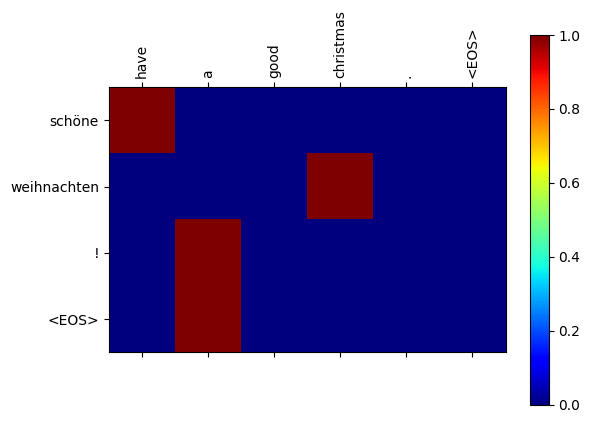

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/content/masked_cross_entropy.py:9: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  seq_range = torch.range(0, max_len - 1).long()


In [90]:
# Begin!
ecs = []
dcs = []
eca = 0
dca = 0

while it < n_iters:
    it += 1
    epoch = int(1 + it // n_samples)
    
    # Get training data for this cycle
    input_batches, input_lengths, target_batches, target_lengths = random_batch(batch_size)

    # Run the train function
    loss, ec, dc = train(
        input_batches, input_lengths, target_batches, target_lengths,
        encoder, decoder,
        encoder_optimizer, decoder_optimizer, criterion
    )

    # Keep track of loss
    print_loss_total += loss
    plot_loss_total += loss
    eca += ec
    dca += dc
    
    job.record(it, loss)
    job.update_progress()

    if it % print_every == 0:
        print(f'{job.pbar}')
        print_loss_avg = print_loss_total / print_every
        print_loss_total = 0
#         print_summary = '%s (%d %d%%) %.4f' % (time_since(start, it / n_iters), epoch, it / n_iters * 100, print_loss_avg)
        print_summary = f'{time_since(start, it / n_iters)}, epoch={epoch}, loss={print_loss_avg:0.3}'
        print(print_summary)
        
    if it % evaluate_every == 0:
        evaluate_randomly()

    if it % plot_every == 0:
        plot_loss_avg = plot_loss_total / plot_every
        plot_losses.append(plot_loss_avg)
        plot_loss_total = 0
        
        # TODO: Running average helper
        ecs.append(eca / plot_every)
        dcs.append(dca / plot_every)
        job.plot_cs(np.array(ecs), 'encoder')
        job.plot_cs(np.array(dcs), 'decoder')
        eca = 0
        dca = 0

# Wyrysowywanie strat treningowych

Wykreślanie odbywa się za pomocą matplotlib, przy użyciu tablicy `plot_losses`, która została utworzona podczas treningu.


<Figure size 640x480 with 0 Axes>

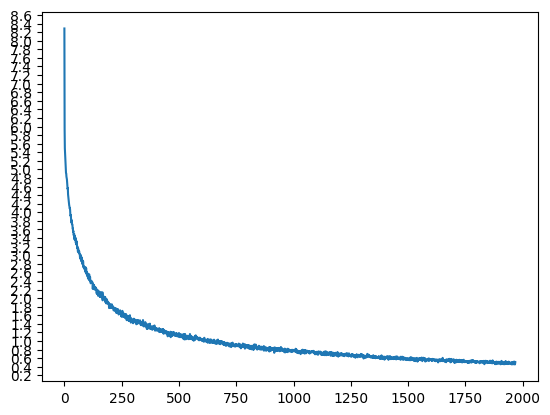

In [91]:
def show_plot(points):
    plt.figure()
    fig, ax = plt.subplots()
    loc = ticker.MultipleLocator(base=0.2) # put ticks at regular intervals
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

show_plot(plot_losses)

In [113]:
plot_losses[-1]

0.506708100438118

In [92]:
MIN_COUNT = 3  # 5
xxx=[print(random.choice(pairs)) for i in range(10)]

['may i direct your attention to this ?', 'darf ich ihre aufmerksamkeit darauf lenken ?']
['tom and mary plan to have a party next week .', 'tom und maria wollen nächste woche eine feier geben .']
['i could imagine that .', 'das könnte ich mir vorstellen .']
['are you in trouble with the law ?', 'hast du schwierigkeiten mit dem gesetz ?']
['tom and mary were seated across from each other .', 'tom und maria saßen einander gegenüber .']
['she listened to music for hours .', 'sie hörte stundenlang musik .']
['out of twenty students , only one has read the book .', 'von zwanzig studentinnen hat nur eine das buch gelesen .']
['this happened prior to receiving your letter .', 'das geschah , bevor ich ihren brief erhielt .']
['tom was sitting next to me .', 'tom saß neben mir .']
['ladies first .', 'die frauen zuerst .']


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


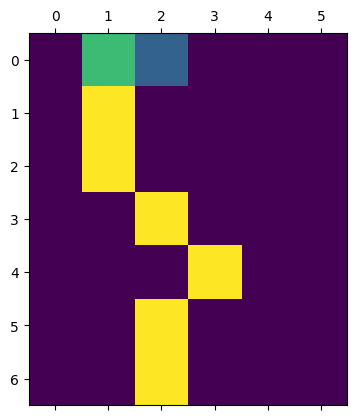

In [93]:
output_words, attentions = evaluate("it's time for lunch .")
plt.matshow(attentions.numpy())
show_plot_visdom()

['i like you very much .', 'ich mag dich sehr .']
["i can't leave .", 'ich kann nicht gehen .']
['i feel very good .', 'ich fühle mich sehr gut .']
["we've been here an hour .", 'wir sind seit einer stunde hier .']
["i don't like it .", 'ich mag es nicht .']
['tom likes boston .', 'tom mag boston .']
['that works .', 'es funktioniert .']
['i will try it again .', 'ich werde es noch einmal versuchen .']
['tom drank some beer .', 'tom hat etwas bier getrunken .']

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


> i like you very much .
= ich mag dich sehr .
< ich mag dich sehr . <EOS>


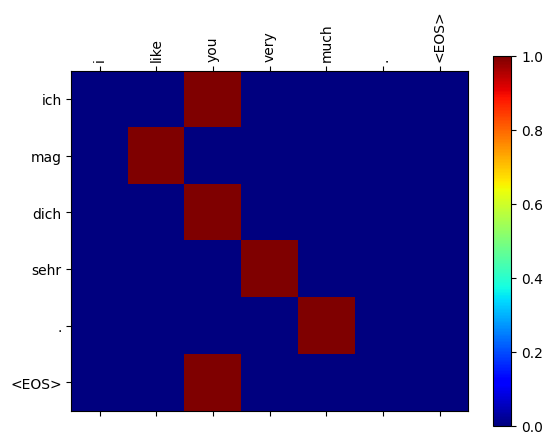

In [94]:
evaluate_and_show_attention('i like you very much .', 'ich mag dich sehr .')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


> i can't leave .
= ich kann nicht gehen .
< ich kann nicht gehen . <EOS>


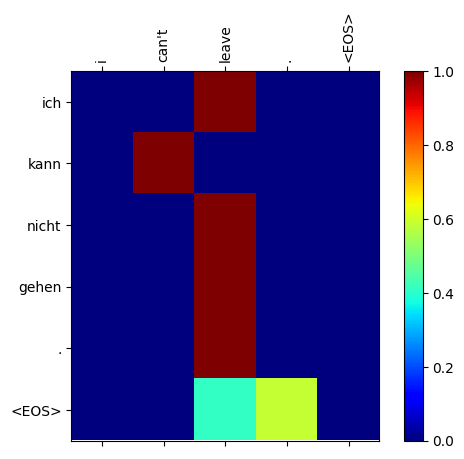

In [95]:
evaluate_and_show_attention("i can't leave .", 'ich kann nicht gehen .')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


> i feel very good .
= ich fühle mich sehr gut .
< ich fühle mich sehr gut . <EOS>


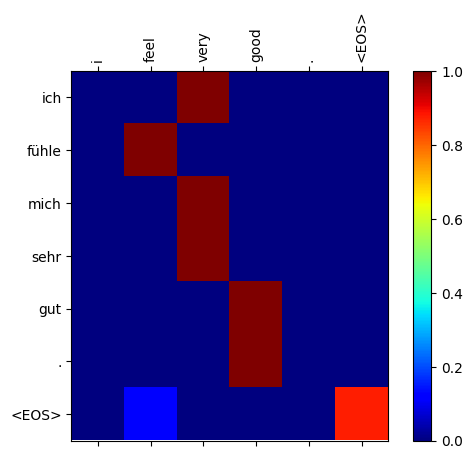

In [96]:
evaluate_and_show_attention('i feel very good .', 'ich fühle mich sehr gut .')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


> we've been here an hour .
= wir sind seit einer stunde hier .
< wir sind schon eine stunde hier . <EOS>


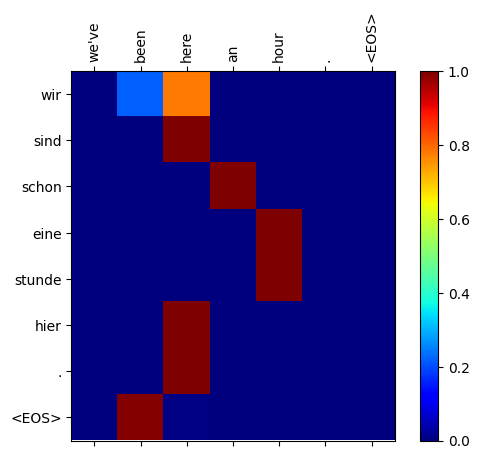

In [97]:
evaluate_and_show_attention("we've been here an hour .", 'wir sind seit einer stunde hier .')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


> i don't like it .
= ich mag es nicht .
< ich mag es nicht . <EOS>


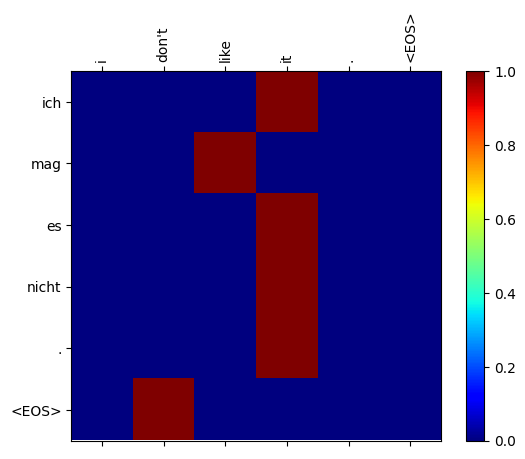

In [98]:
evaluate_and_show_attention("i don't like it .", 'ich mag es nicht .')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


> tom likes boston .
= tom mag boston .
< tom mag boston . <EOS>


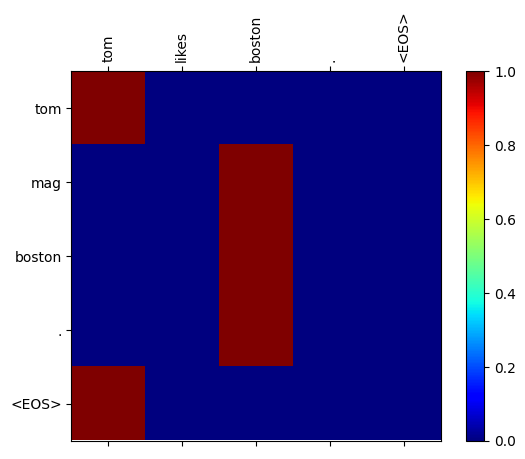

In [99]:
evaluate_and_show_attention('tom likes boston .', 'tom mag boston .')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


> that works .
= es funktioniert .
< das funktioniert . <EOS>


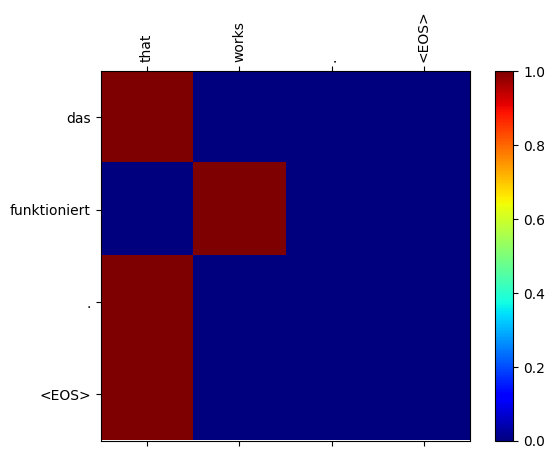

In [100]:
evaluate_and_show_attention('that works .', 'es funktioniert .')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


> i will try it again .
= ich werde es noch einmal versuchen .
< ich werde es wieder versuchen . <EOS>


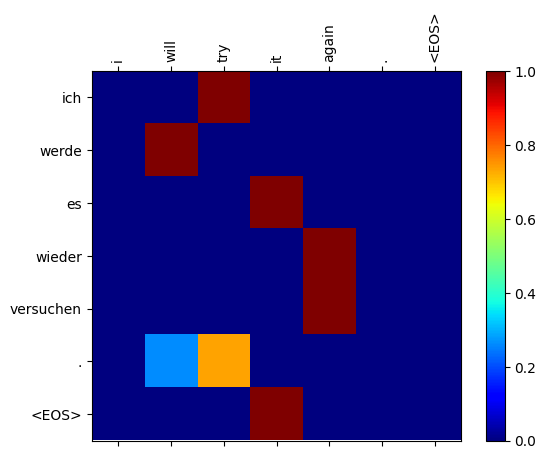

In [101]:
evaluate_and_show_attention('i will try it again .', 'ich werde es noch einmal versuchen .')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


> tom drank some beer .
= tom hat etwas bier getrunken .
< tom trank ein bier . <EOS>


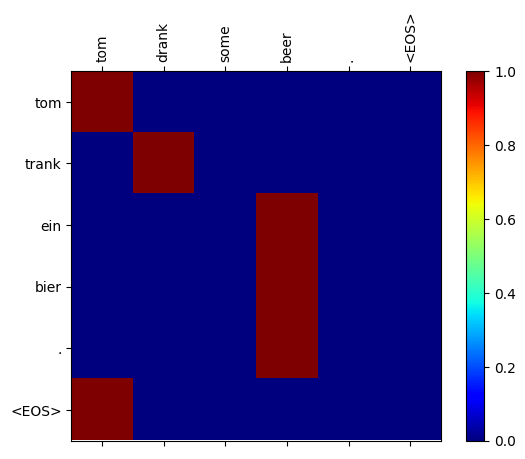

In [102]:
evaluate_and_show_attention('tom drank some beer .', 'tom hat etwas bier getrunken .')

Trochę trudniejsze zdania

Ich habe zwei Kinder, zwei und vier Jahre alt.
I have two children aged two and four.
Das zwei Jahre alte Kind ist in dem Alter, in dem sie viel Lärm machen.
The two year old is at that age where they get really noisy.

> i have two children , aged two and four .
= ich habe zwei Kinder , zwei und vier Jahre alt .
< ich habe zwei kinder , zwei und vier vier . <EOS>


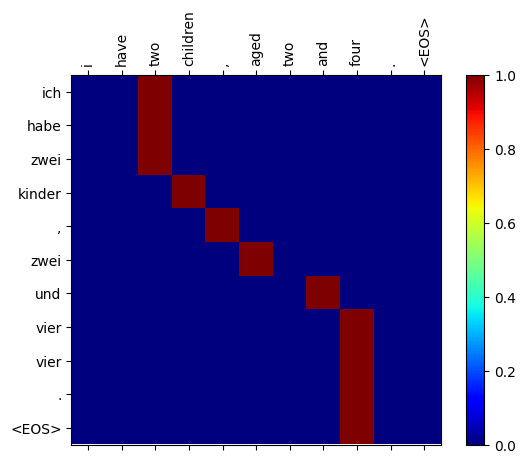

In [118]:
evaluate_and_show_attention('i have two children , aged two and four .', 'ich habe zwei Kinder , zwei und vier Jahre alt .')

> the two year old is at that age where they get really noisy .
= das zwei jahre alte kind ist in dem alter, in dem sie viel lärm machen .
< das beiden , wo die beiden alte sind , in dem sie sich zumindest . <EOS>


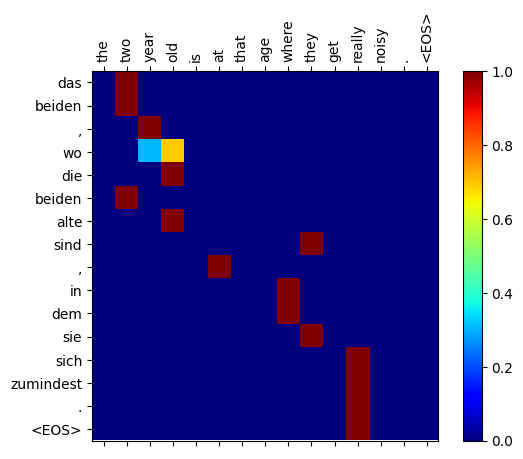

In [119]:
evaluate_and_show_attention('the two year old is at that age where they get really noisy .', 'das zwei jahre alte kind ist in dem alter, in dem sie viel lärm machen .')

# Zapis modelu

In [ ]:
# model: encoder, decoder, vocab: lang1, lang2

In [103]:
encoder.state_dict

<bound method Module.state_dict of EncoderRNN(
  (embedding): Embedding(9392, 500)
  (gru): GRU(500, 500, num_layers=2, dropout=0.1, bidirectional=True)
)>

In [104]:
decoder.state_dict

<bound method Module.state_dict of LuongAttnDecoderRNN(
  (embedding): Embedding(14603, 500)
  (embedding_dropout): Dropout(p=0.1, inplace=False)
  (gru): GRU(500, 500, num_layers=2, dropout=0.1)
  (concat): Linear(in_features=1000, out_features=500, bias=True)
  (out): Linear(in_features=500, out_features=14603, bias=True)
  (attn): Attn(
    (attn): Linear(in_features=500, out_features=500, bias=True)
  )
)>

In [105]:
dataset_path = Path('data/seq2seq')
tmp_path = dataset_path / 'tmp/'
!mkdir -p $tmp_path

In [106]:
ls -lah /content/data/seq2seq/tmp

total 8.0K
drwxr-xr-x 2 root root 4.0K Dec 13 18:44 ./
drwxr-xr-x 3 root root 4.0K Dec 13 18:44 ../


In [107]:
VOCAB, ENCODER, DECODER = ['vocab', 'encoder', 'decoder']
fn_trn1 = {VOCAB: 'eng-deu.vocab.1.p', \
           ENCODER: 'batched.encoder.h500.l2.e10000.gpu.torch', \
           DECODER: 'batched.decoder.h500.l2.e10000.gpu.torch'
          }
fn_dict = fn_trn1

In [108]:
warnings.filterwarnings('ignore')

torch.save(encoder, tmp_path / fn_dict[ENCODER])
torch.save(decoder, tmp_path / fn_dict[DECODER])

In [109]:
# save vocab

vocab = {'input_lang': input_lang, 'output_lang': output_lang}

pickle.dump(vocab, open(tmp_path / fn_dict[VOCAB], 'wb'))

In [110]:
ls -lah $tmp_path

total 118M
drwxr-xr-x 2 root root 4.0K Dec 13 18:44 ./
drwxr-xr-x 3 root root 4.0K Dec 13 18:44 ../
-rw-r--r-- 1 root root  71M Dec 13 18:44 batched.decoder.h500.l2.e10000.gpu.torch
-rw-r--r-- 1 root root  47M Dec 13 18:44 batched.encoder.h500.l2.e10000.gpu.torch
-rw-r--r-- 1 root root 838K Dec 13 18:44 eng-deu.vocab.1.p
